### Please note that I changed the formatting of my stock-all.csv! Please use the stock-all.csv that I've uploaded when reviewing this Python notebook.

There are several steps that I used to analyse the data. I mainly used classification, scatterplots and histograms to get a better understanding of the data and its patterns. In this project I will be using SciKit learn which is imported in a Jupyter notebook.
References:
•	https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
•	https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
Here are the steps I used to understand the data:
    1.	Describe the dependencies used in the Jupyter notebook.
    2.	Collect the data of all the stocks in stock-all.csv.
        a.	Describe the data.
        b.	Transform the data for modelling.
    3.	Modelling using Linear Regression.
        a.	Plotting Close vs Date for each stock.
        b.	Plotting the max average closing price.
        c.	Training the data and separating them in train and test for linear regression.
        d.	Compare the predictions from linear regression against the actual data.
        e.	Plotting the linear regression graph.
        f.	Check the rolling mean of the closing prices.
        g.	Check the absolute error, mean squared error and root mean squared error.
        h.	Plotting the moving average of the closing price.
        i.	Explaining Return Deviation and using the Return Deviation graph to check whether you the stock is stable and profitable.
    4.	Analysing the provided stocks against each other.
        a.	Correlation analysis.
        b.	Stocks Returns Rate and Risk.
Understanding the features in stock-all.csv:
    •	tdate
        o	The date the data was collected regarding the stock.
    •	stock_id
        o	Used to identify the stock.
    •	open
        o	The price of the stock when the stock market opens.
    •	close
        o	The price of the stock when the stock market closes. 
    •	high
        o	The highest price of the stock in that day.
    •	low
        o	The lowest price of the stock in that day.
    •	Volume
        o	 Number of shares of that stock traded on that day.
 
The target variable we are going to be using is closing price. Closing price is usually the most important feature in stock marketing for several reasons:

        o	“The closing stock price is significant for several reasons. Investors, traders, financial institutions, regulators and other stakeholders use it as a reference point for determining performance over a specific time such as one year, a week and over a shorter time frame such as one minute or less. In fact, investors and other stakeholders base their decisions on closing stock prices. Institutional investors monitor a stock's closing price to make decisions regarding their investment portfolios.”


#### Step 1 is describing the dependencies of this Python notebook:


In [761]:
import datetime as dt #Date and time formatting.
import numpy as np #Perform calculations on data.
import matplotlib.pyplot as plt #Plot data with models for analysis.
from matplotlib import style #Just for styling the graphs.
from sklearn.svm import SVR #Build predictive models.
import pandas as pd 
import pandas_datareader.data as web #Read data from the internet.
from sklearn.svm import SVR #Build predictive models.

import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [762]:
style.use ( 'ggplot' ) #Just a style.

#### Step 2 is to collect the data of all the stocks from stock-all.csv then describe and transform them for modelling:
 * stock_ids of stocks of collected data:
     * 1
     * 11
     * 293
     * 857
     * 13
     * 23

 * #### Below is the code for collecting the stock data from stock-all.csv:
   * Data collected is printed using the head () function.
 * #### Below, after collecting the stock data from stock-all,csv, we describe the data:
  * We use the function shape () to show to shape of the stock data.
  * Furthermore, we use the function describe () to have a better understanding of the stock.
  * We check the skewness of the feature using skew () function.
 * #### After describing the data, we have to transform the data with np.log () to create a normal distribution of the stock data.
  * We the use np.log() on each feature to transform the data onto a normal    distribution so that the skewness is improved for each feature.

In [763]:
i = []
for c in range ( 0, 1856 ):
    i.append ( c )
    
i857 = []
for c in range ( 68, 1856 ):
    i857.append ( c )

In [764]:
dfStock1 = pd.read_csv ('stock-all.csv', parse_dates = [ 0 ], usecols = [ 1, 0, 2, 3, 4, 5, 6 ]  )
dfStock1[ 'day' ] = i
print ( dfStock1.head () )

print ()
dfStock11 = pd.read_csv ('stock-all.csv', parse_dates = [ 0 ],  usecols = [ 8, 0, 10, 11, 12, 13, 14 ]  )
dfStock11 [ 'day' ] = i
print ( dfStock11.head () )

print ()
dfStock293 = pd.read_csv ('stock-all.csv', parse_dates = [ 0 ],  usecols = [ 16, 0, 18, 19, 20, 21, 22 ]  )
dfStock293 [ 'day' ] = i
print ( dfStock293.head () )

print ()
stock857_colNames = [ 'tdate', 'stock_id.3', 'open3', 'close3', 'high3', 'low3', 'volume3' ] 
dfStock857 = pd.read_csv ('stock-all.csv', names = stock857_colNames, header = None, skiprows = 69, parse_dates = [ 0 ],  usecols = [ 24, 0, 26, 27, 28, 29, 30 ]  )
dfStock857 [ 'day' ] = i857
print ( dfStock857.head () )

print ()
dfStock13 = pd.read_csv ('stock-all.csv', parse_dates = [ 0 ],  usecols = [ 32, 0, 34, 35, 36, 37, 38 ]  )
dfStock13 [ 'day' ] = i
print ( dfStock13.head () )

print ()
dfStock23 = pd.read_csv ('stock-all.csv', parse_dates = [ 0 ],  usecols = [ 40, 0, 41, 42, 43, 44, 45 ]  )
dfStock23 [ 'day' ] = i
print ( dfStock23.head () )

       tdate  stock_id   open  close   high    low   volume  day
0 2000-04-01         1  100.0  98.00  101.0  98.00  2283100    0
1 2000-05-01         1   93.5  91.25   95.0  90.75  4330100    1
2 2000-06-01         1   92.0  86.75   92.5  85.00  7462000    2
3 2000-07-01         1   88.0  88.50   89.0  86.50  4323800    3
4 2000-10-01         1   91.5  89.25   93.0  89.25  3713200    4

       tdate  stock_id.1  open1  close1  high1   low1  volume1  day
0 2000-04-01          11  86.75   86.50  87.25  86.25  1211400    0
1 2000-05-01          11  84.00   81.75  86.50  81.25  3586200    1
2 2000-06-01          11  82.50   76.75  82.50  75.25  5992700    2
3 2000-07-01          11  78.00   81.50  81.75  78.00  3248900    3
4 2000-10-01          11  84.00   80.75  84.50  80.25  2107400    4

       tdate  stock_id.2  open2  close2  high2  low2   volume2  day
0 2000-04-01         293  13.30   13.10  13.60  13.1   5375000    0
1 2000-05-01         293  12.95   12.30  13.30  12.0   8835300  

In [765]:
#This part I do the following:
  #1. Show the shape of each stock's dataframe
  #2. Describe the the data of each stock using the describe function.
  #3. Show the skew of each feature in each stock.

print ( "Stock 1's shape:", dfStock1.shape )
print ( dfStock1.describe () )
print ()
print ( "Skew of each attribute in stock 1:" )
print ( dfStock1.skew () )

print ()
print ( "Stock 11's shape:", dfStock11.shape )
print ( dfStock11.describe () )
print ()
print ( "Skew of each attribute in stock 11:" )
print ( dfStock11.skew () )

print ()
print ( "Stock 293's shape:", dfStock293.shape )
print ( dfStock293.describe () )
print ()
print ( "Skew of each attribute in stock 293:" )
print ( dfStock293.skew () )

print ()
print ( "Stock 857's shape:", dfStock857.shape )
print ( dfStock857.describe () )
print ()
print ( "Skew of each attribute in stock 857:" )
print ( dfStock857.skew () )

print ()
print ( "Stock 13's shape:", dfStock13.shape )
print ( dfStock13.describe () )
print ()
print ( "Skew for each attribute in stock 13:" )
print ( dfStock13.skew () )

print ()
print ( "Stock 23's shape:", dfStock23.shape )
print ( dfStock23.describe () )
print ()
print ( "Skew for each attribute in stock 23:" )
print ( dfStock23.skew () )

Stock 1's shape: (1856, 8)
       stock_id         open        close         high          low  \
count    1856.0  1856.000000  1856.000000  1856.000000  1856.000000   
mean        1.0    74.907031    74.869046    75.681492    74.070205   
std         0.0    15.914997    15.908620    16.165828    15.681254   
min         1.0    39.800000    40.500000    40.800000    39.800000   
25%         1.0    63.000000    63.000000    64.000000    62.437500   
50%         1.0    75.000000    74.750000    75.450000    74.000000   
75%         1.0    85.500000    85.500000    86.375000    84.750000   
max         1.0   122.000000   121.000000   123.500000   117.000000   

             volume          day  
count  1.856000e+03  1856.000000  
mean   5.334605e+06   927.500000  
std    3.480975e+06   535.925368  
min    0.000000e+00     0.000000  
25%    3.512650e+06   463.750000  
50%    4.821650e+06   927.500000  
75%    6.571500e+06  1391.250000  
max    5.774370e+07  1855.000000  

Skew of each attr

Skew for stock 1 open feature ( unskewed ): 0.017594459743066126


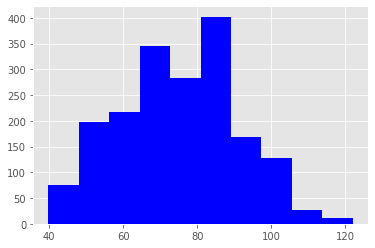

Skew for stock 1 close feature ( unskewed ): 0.019645364087712495


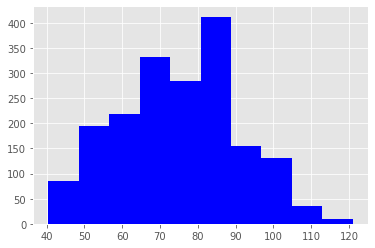

Skew for stock 1 high feature ( unskewed ): 0.056462337130858575


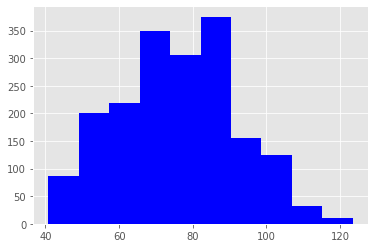

Skew for stock 1 low feature ( unskewed ): -0.014312833861626484


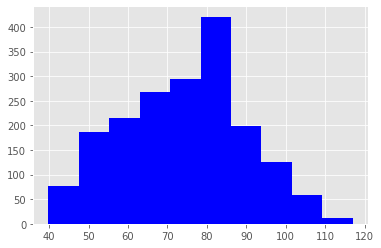

In [766]:
#All features before they are transformed by normalization:

print ( "Skew for stock 1 open feature ( unskewed ):", dfStock1.open.skew () )
plt.hist ( dfStock1.open, color = 'blue')
plt.show ()

print ( "Skew for stock 1 close feature ( unskewed ):", dfStock1.close.skew () )
plt.hist ( dfStock1.close, color= 'blue' )
plt.show ()

print ( "Skew for stock 1 high feature ( unskewed ):", dfStock1.high.skew () )
plt.hist ( dfStock1.high, color = 'blue' )
plt.show ()

print ( "Skew for stock 1 low feature ( unskewed ):", dfStock1.low.skew () )
plt.hist ( dfStock1.low, color = 'blue' )
plt.show ()

Skew for stock 11 open feature ( unskewed ): -0.3967276534828831


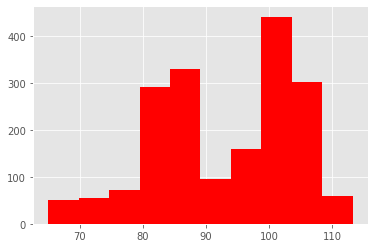

Skew for stock 11 close feature ( unskewed ): -0.3954657568344821


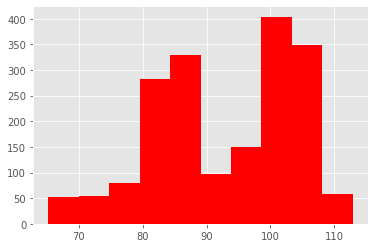

Skew for stock 11 high feature ( unskewed ): -0.3921210006588223


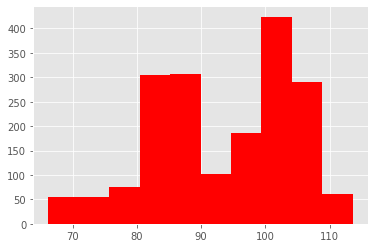

Skew for stock 11 low feature ( unskewed ): -0.3989871984858205


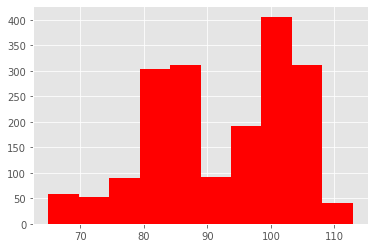

In [767]:
#All features before they are transformed by normalization:

print ( "Skew for stock 11 open feature ( unskewed ):", dfStock11.open1.skew () )
plt.hist ( dfStock11.open1, color='red' )
plt.show ()

print ( "Skew for stock 11 close feature ( unskewed ):", dfStock11.close1.skew () )
plt.hist( dfStock11.close1, color='red' )
plt.show()

print ( "Skew for stock 11 high feature ( unskewed ):", dfStock11.high1.skew () )
plt.hist ( dfStock11.high1, color='red' )
plt.show ()

print ( "Skew for stock 11 low feature ( unskewed ):", dfStock11.low1.skew () )
plt.hist ( dfStock11.low1, color='red' )
plt.show ()

Skew for stock 293 open feature ( unskewed ): 0.24490937007424357


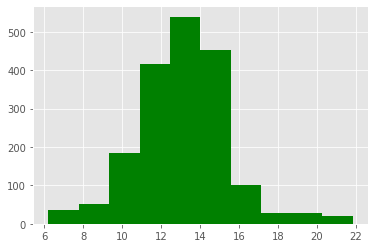

Skew for stock 293 close feature ( unskewed ): 0.26734363279123174


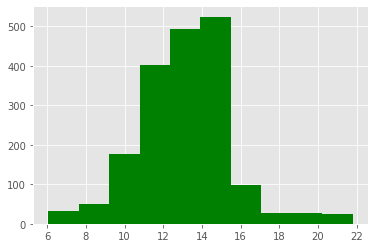

Skew for stock 293 high feature ( unskewed ): 0.31470786716072696


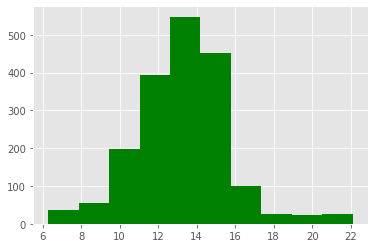

Skew for stock 293 low feature ( unskewed ): 0.2052298191987507


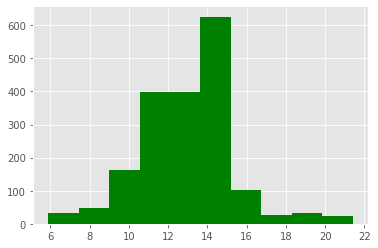

In [768]:
#All features before they are transformed by normalization:

print ( "Skew for stock 293 open feature ( unskewed ):", dfStock293.open2.skew () )
plt.hist ( dfStock293.open2, color='green' )
plt.show ()

print ( "Skew for stock 293 close feature ( unskewed ):", dfStock293.close2.skew () )
plt.hist( dfStock293.close2, color='green' )
plt.show()

print ( "Skew for stock 293 high feature ( unskewed ):", dfStock293.high2.skew () )
plt.hist ( dfStock293.high2, color='green' )
plt.show ()

print ( "Skew for stock 293 low feature ( unskewed ):", dfStock293.low2.skew () )
plt.hist ( dfStock293.low2, color='green' )
plt.show ()

Skew for stock 857 open feature ( unskewed ): 0.9575875514317326


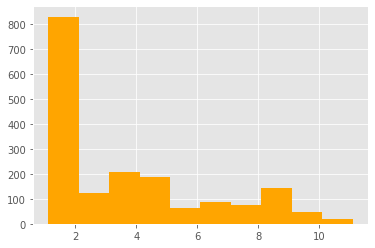

Skew for stock 857 close feature ( unskewed ): 0.9577693619220388


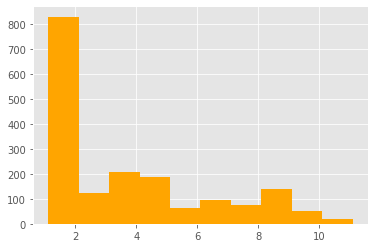

Skew for stock 857 high feature ( unskewed ): 0.9576813918107261


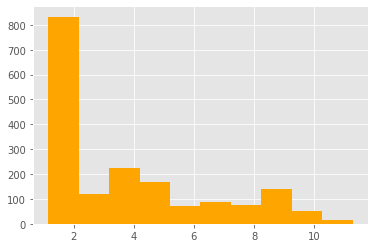

Skew for stock 857 low feature ( unskewed ): 0.95810259749376


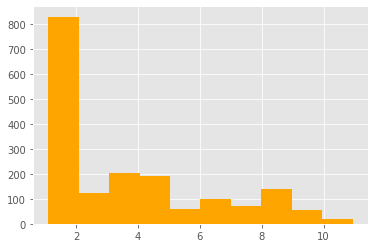

In [769]:
#All features before they are transformed by normalization:

print ( "Skew for stock 857 open feature ( unskewed ):", dfStock857.open3.skew () )
plt.hist ( dfStock857.open3, color='orange' )
plt.show ()

print ( "Skew for stock 857 close feature ( unskewed ):", dfStock857.close3.skew () )
plt.hist( dfStock857.close3, color='orange' )
plt.show()

print ( "Skew for stock 857 high feature ( unskewed ):", dfStock857.high3.skew () )
plt.hist ( dfStock857.high3, color='orange' )
plt.show ()

print ( "Skew for stock 857 low feature ( unskewed ):", dfStock857.low3.skew () )
plt.hist ( dfStock857.low3, color='orange' )
plt.show ()

Skew for stock 13 open feature ( unskewed ): 1.1255683739767566


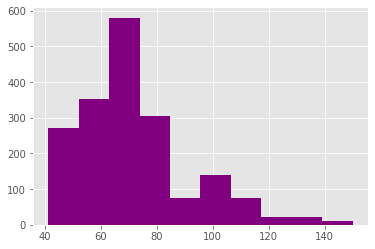

Skew for stock 13 close feature ( unskewed ): 1.1245354847511382


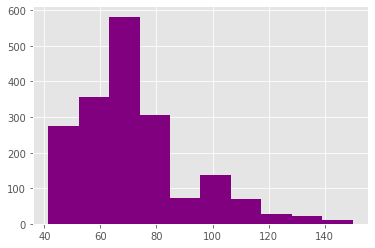

Skew for stock 13 high feature ( unskewed ): 1.1744662475620282


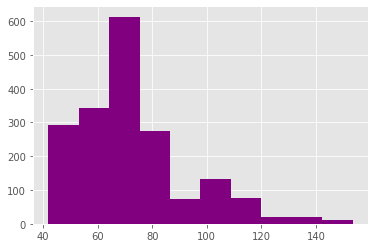

Skew for stock 13 low feature ( unskewed ): 1.0788345722649044


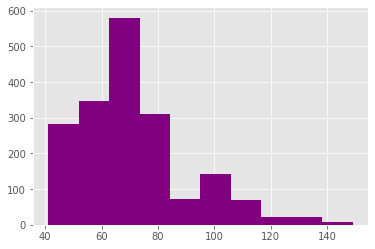

In [770]:
#All features before they are transformed by normalization:

print ( "Skew for stock 13 open feature ( unskewed ):", dfStock13.open4.skew () )
plt.hist ( dfStock13.open4, color='purple' )
plt.show ()

print ( "Skew for stock 13 close feature ( unskewed ):", dfStock13.close4.skew () )
plt.hist( dfStock13.close4, color='purple' )
plt.show()

print ( "Skew for stock 13 high feature ( unskewed ):", dfStock13.high4.skew () )
plt.hist ( dfStock13.high4, color='purple' )
plt.show ()

print ( "Skew for stock 13 low feature ( unskewed ):", dfStock13.low4.skew () )
plt.hist ( dfStock13.low4, color='purple' )
plt.show ()

Skew for stock 1 open feature:
Skew is: -0.4374594283148


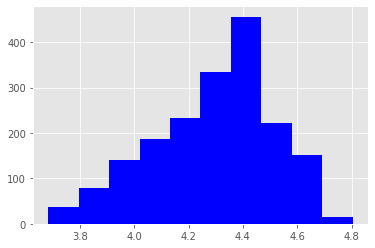

Skew for stock 1 close feature:
Skew is: -0.43435564349761896


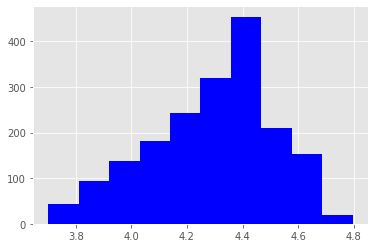

Skew for stock 1 high feature:
Skew is: -0.41531990402331226


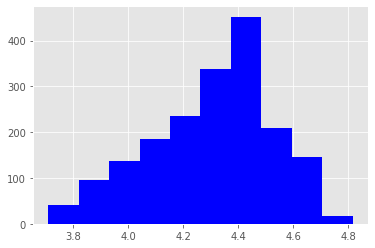

Skew for stock 1 low feature:
Skew is: -0.4541394386739451


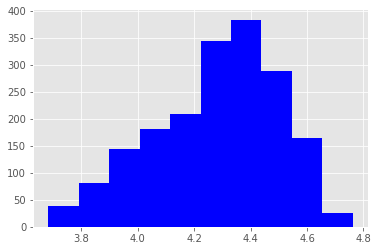

In [771]:
#All features after transformed by normalization:

print ( "Skew for stock 1 open feature:" )
stock1OpenTarget = np.log ( dfStock1.open )
print ("Skew is:", stock1OpenTarget.skew())
plt.hist(stock1OpenTarget, color='blue')
plt.show()

print ( "Skew for stock 1 close feature:" )
stock1CloseTarget = np.log ( dfStock1.close )
print ("Skew is:", stock1CloseTarget.skew())
plt.hist(stock1CloseTarget, color='blue')
plt.show()

print ( "Skew for stock 1 high feature:" )
stock1HighTarget = np.log ( dfStock1.high )
print ("Skew is:", stock1HighTarget.skew())
plt.hist(stock1HighTarget, color='blue')
plt.show()

print ( "Skew for stock 1 low feature:" )
stock1LowTarget = np.log ( dfStock1.low )
print ("Skew is:", stock1LowTarget.skew())
plt.hist(stock1LowTarget, color='blue')
plt.show()

Skew for stock 11 open feature:
Skew is: -0.6030675608648423


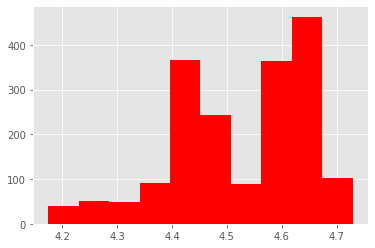

Skew for stock 11 close feature:
Skew is: -0.6008075501259098


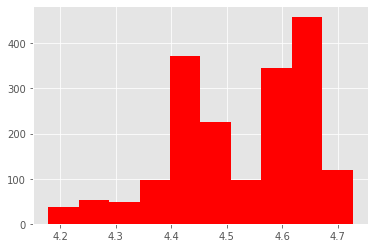

Skew for stock 11 high feature:
Skew is: -0.5943056733284572


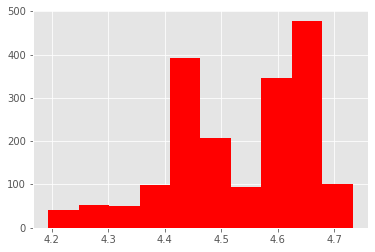

Skew for stock 11 low feature:
Skew is: -0.608163732898282


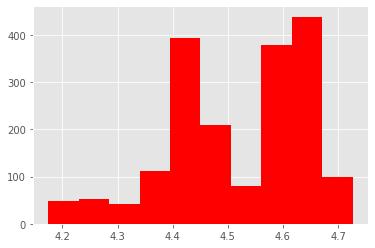

In [772]:
#All features after transformed by normalization:

print ( "Skew for stock 11 open feature:" )
stock11OpenTarget = np.log ( dfStock11.open1 )
print ("Skew is:", stock11OpenTarget.skew())
plt.hist(stock11OpenTarget, color='red')
plt.show()

print ( "Skew for stock 11 close feature:" )
stock11CloseTarget = np.log ( dfStock11.close1 )
print ("Skew is:", stock11CloseTarget.skew())
plt.hist(stock11CloseTarget, color='red')
plt.show()

print ( "Skew for stock 11 high feature:" )
stock11HighTarget = np.log ( dfStock11.high1 )
print ("Skew is:", stock11HighTarget.skew())
plt.hist(stock11HighTarget, color='red')
plt.show()

print ( "Skew for stock 11 low feature:" )
stock11LowTarget = np.log ( dfStock11.low1 )
print ("Skew is:", stock11LowTarget.skew())
plt.hist(stock11LowTarget, color='red')
plt.show()

Skew for stock 293 open feature:
Skew is: -0.6524973919381508


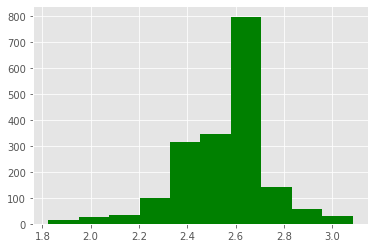

Skew for stock 293 close feature:
Skew is: -0.646917667580635


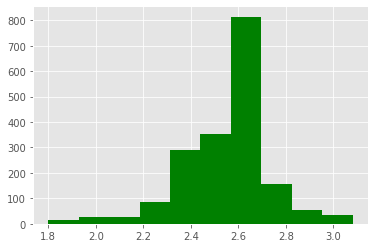

Skew for stock 293 high feature:
Skew is: -0.6063651302970386


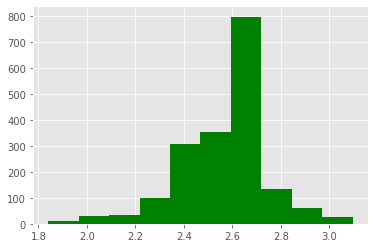

Skew for stock 11 low feature:
Skew is: -0.6948823219570731


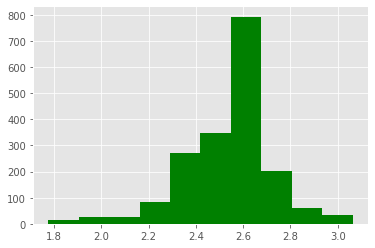

In [773]:
#All features after transformed by normalization:

print ( "Skew for stock 293 open feature:" )
stock293OpenTarget = np.log ( dfStock293.open2 )
print ("Skew is:", stock293OpenTarget.skew())
plt.hist(stock293OpenTarget, color='green')
plt.show()

print ( "Skew for stock 293 close feature:" )
stock293CloseTarget = np.log ( dfStock293.close2 )
print ("Skew is:", stock293CloseTarget.skew())
plt.hist(stock293CloseTarget, color='green')
plt.show()

print ( "Skew for stock 293 high feature:" )
stock293HighTarget = np.log ( dfStock293.high2 )
print ("Skew is:", stock293HighTarget.skew())
plt.hist(stock293HighTarget, color='green')
plt.show()

print ( "Skew for stock 11 low feature:" )
stock293LowTarget = np.log ( dfStock293.low2 )
print ("Skew is:", stock293LowTarget.skew())
plt.hist(stock293LowTarget, color='green')
plt.show()

Skew for stock 857 open feature:
Skew is: 0.36936365591866493


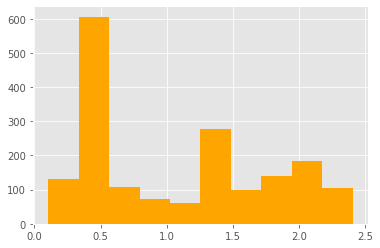

Skew for stock 857 close feature:
Skew is: 0.36888956614169816


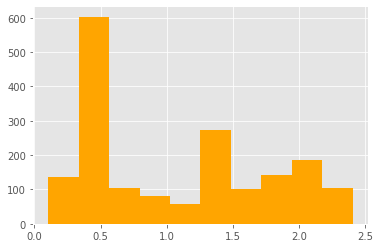

Skew for stock 857 high feature:
Skew is: 0.3684991641674674


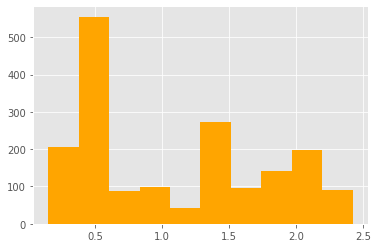

Skew for stock 857 low feature:
Skew is: 0.3707495150647977


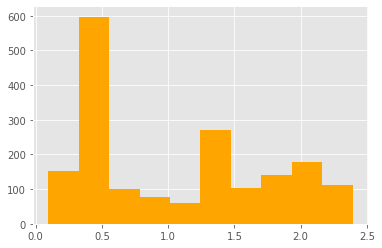

In [774]:
#All features after transformed by normalization:

print ( "Skew for stock 857 open feature:" )
stock857OpenTarget = np.log ( dfStock857.open3 )
print ("Skew is:", stock857OpenTarget.skew())
plt.hist(stock857OpenTarget, color='orange')
plt.show()

print ( "Skew for stock 857 close feature:" )
stock857CloseTarget = np.log ( dfStock857.close3 )
print ("Skew is:", stock857CloseTarget.skew())
plt.hist(stock857CloseTarget, color='orange')
plt.show()

print ( "Skew for stock 857 high feature:" )
stock857HighTarget = np.log ( dfStock857.high3 )
print ("Skew is:", stock857HighTarget.skew())
plt.hist(stock857HighTarget, color='orange')
plt.show()

print ( "Skew for stock 857 low feature:" )
stock857LowTarget = np.log ( dfStock857.low3 )
print ("Skew is:", stock857LowTarget.skew())
plt.hist(stock857LowTarget, color='orange')
plt.show()

Skew for stock 13 open feature:
Skew is: 0.4117094481122125


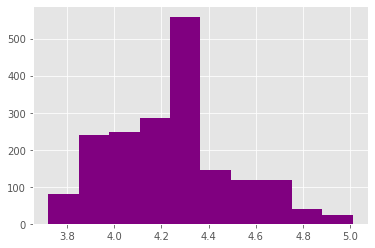

Skew for stock 13 close feature:
Skew is: 0.4107379121564881


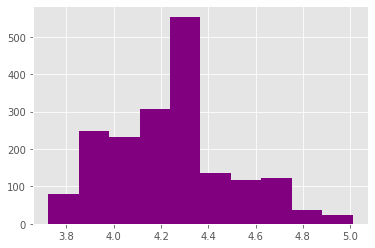

Skew for stock 13 high feature:
Skew is: 0.44803782413233745


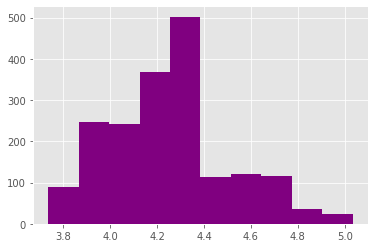

Skew for stock 13 low feature:
Skew is: 0.375638308964287


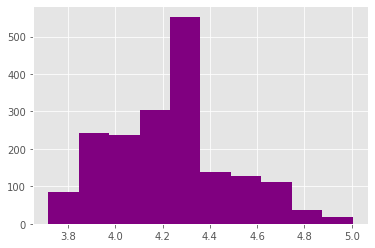

In [775]:
#All features after transformed by normalization:

print ( "Skew for stock 13 open feature:" )
stock13OpenTarget = np.log ( dfStock13.open4 )
print ("Skew is:", stock13OpenTarget.skew())
plt.hist(stock13OpenTarget, color='purple')
plt.show()

print ( "Skew for stock 13 close feature:" )
stock13CloseTarget = np.log ( dfStock13.close4 )
print ("Skew is:", stock13CloseTarget.skew())
plt.hist(stock13CloseTarget, color='purple')
plt.show()

print ( "Skew for stock 13 high feature:" )
stock13HighTarget = np.log ( dfStock13.high4 )
print ("Skew is:", stock13HighTarget.skew())
plt.hist(stock13HighTarget, color='purple')
plt.show()

print ( "Skew for stock 13 low feature:" )
stock13LowTarget = np.log ( dfStock13.low4 )
print ("Skew is:", stock13LowTarget.skew())
plt.hist(stock13LowTarget, color='purple')
plt.show()

Skew for stock 23 open feature:
Skew is: 0.7652673706068536


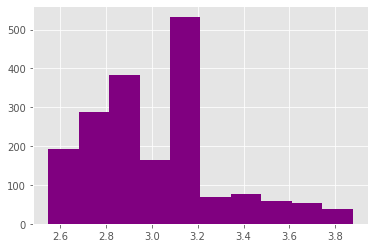

Skew for stock 23 close feature:
Skew is: 0.7703309874188606


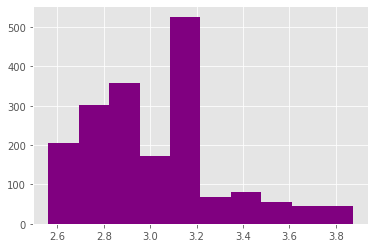

Skew for stock 23 high feature:
Skew is: 0.7794911861118188


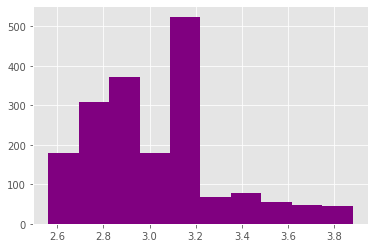

Skew for stock 23 low feature:
Skew is: 0.7563874974616308


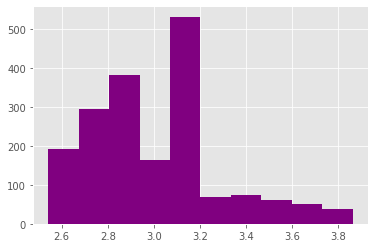

In [776]:
#All features after transformed by normalization:

print ( "Skew for stock 23 open feature:" )
stock23OpenTarget = np.log ( dfStock23.open5 )
print ("Skew is:", stock23OpenTarget.skew())
plt.hist(stock23OpenTarget, color='purple')
plt.show()

print ( "Skew for stock 23 close feature:" )
stock23CloseTarget = np.log ( dfStock23.close5 )
print ("Skew is:", stock23CloseTarget.skew())
plt.hist(stock23CloseTarget, color='purple')
plt.show()

print ( "Skew for stock 23 high feature:" )
stock23HighTarget = np.log ( dfStock23.high5 )
print ("Skew is:", stock23HighTarget.skew())
plt.hist(stock23HighTarget, color='purple')
plt.show()

print ( "Skew for stock 23 low feature:" )
stock23LowTarget = np.log ( dfStock23.low5 )
print ("Skew is:", stock23LowTarget.skew())
plt.hist(stock23LowTarget, color='purple')
plt.show()

#### Step 3: Modelling using Linear Regression:
 * Linear Regression Theory
  * Linear regression performs a prediction where the y axis which is also the dependent variable is found using the x axis which is the independent variable. Plotting both x and y would result a best fit straight line where closing prices are most likely to be positioned.
  * Below, I will be using linear regression to predict the closing prices. x is the day and y is the closing price.
  * I have performed a transformation to the closing prices so that it can be used in linear regression.
  
#### Referenced from:
 * https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f
 * https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

### Stock 1 Modelling starts here:

In [777]:
#stock1DatesRESHAPED = np.reshape ( dfStock1.index, ( len ( dfStock1.index ), 1 ) )

#svr_lin = SVR ( kernel = 'linear', C=1e3, gamma = 'scale' )
#svr_poly = SVR ( kernel = 'poly', C=1e3, degree = 2, gamma = 'scale')
#svr_rbf = SVR ( kernel = 'rbf', C=1e3, gamma = 'scale' )

#svr_lin.fit ( stock1DatesRESHAPED[0:20], stock1OpenTarget[0:20] )
#svr_poly.fit ( stock1DatesRESHAPED, stock1OpenTarget )
#svr_rbf.fit ( stock1DatesRESHAPED, stock1OpenTarget ) 

#plt.scatter ( stock1DatesRESHAPED, dfStock1.open, color = 'black', label = 'Data'  )
#plt.plot ( stock1DatesRESHAPED, svr_rbf.predict ( stock1DatesRESHAPED ), color = 'red', label = 'RBF model' )
#plt.plot ( stock1DatesRESHAPED, svr_lin.predict ( stock1DatesRESHAPED ), color = 'green', label = 'Linear model' )
#plt.plot ( stock1DatesRESHAPED, svr_poly.predict ( stock1DatesRESHAPED ), color = 'blue', label = 'Polynomial model' )
#plt.xlabel ( 'Day' )
#plt.ylabel ( 'Open Price' )
#plt.title = ( 'Support Vector Regression' )
#plt.legend ()
#plt.show ()

<Figure size 1080x720 with 0 Axes>

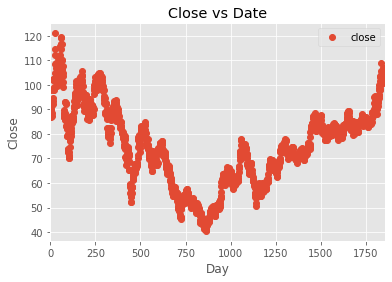

In [778]:
#Here we plot the graph regarding Close vs Date. I plotted it just
#just to see if we can find any correlation between the Close and Date.

plt.figure( 11, figsize = ( 15, 10 ) )
dfStock1.plot( x='day', y='close', style='o' )  
plt.title('Close vs Date')  
plt.xlabel('Day')  
plt.ylabel('Close')  
plt.show()

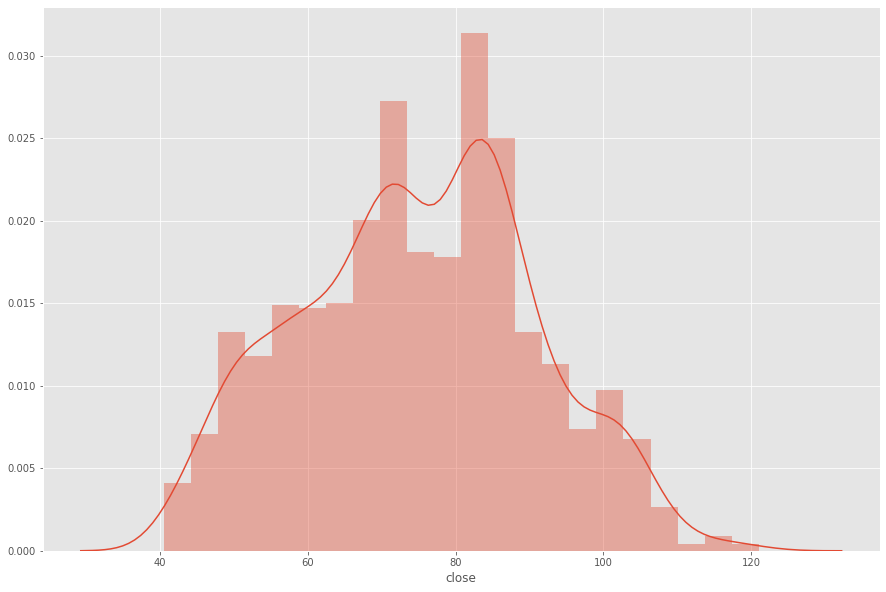

In [779]:
#Here we check the average max closing price which is around 80-90.
plt.figure( figsize = ( 15, 10 ) )
plt.tight_layout ()
seabornInstance.distplot ( dfStock1 [ 'close' ] )

In [780]:

# Drop missing value
#dfreg.fillna(value=-99999, inplace=True)# We want to separate 1 percent of the data to forecast
#forecast_out = int(math.ceil(0.01 * len(dfreg)))# Separating the label here, we want to predict the AdjClose
#forecast_col = 'Adj Close'
#dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
#X = np.array(dfreg.drop(['label'], 1))# Scale the X so that everyone can have the same distribution for linear regression
#X = preprocessing.scale(X)# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
#X_lately = X[-forecast_out:]
#X = X[:-forecast_out]# Separate label and identify it as y
#y = np.array(dfreg['label'])
#y = y[:-forecast_out]

In [781]:
#Dividing data into attributes and labels.
#Attributes are independent variables and labels are dependent variables.

X = dfStock1['day'].values.reshape(-1,1) #Independent vriable is day so stored in X axis.
y = stock1CloseTarget.values.reshape(-1,1) #Dependent variable is closing price so stored in Y axis.

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0 ) #Split data into 80% training and 20% testing data.

regressor = LinearRegression () #Instantiate the algorithm.
regressor.fit(X_train, y_train) #Training the algorithm.

#Below shows the intercept needed to get the best fit line for the data.
print( regressor.intercept_ )#For retrieving the slope:
#Below shows the gradient needed to get the best fit line for the data.
print( regressor.coef_ )

#The results are 4.309 for intercept and -2.04873897e-05 for gradient.
#This means that for every day, the cahnge to the closing price is -2.04873897e-05%.

#Comparing actual data to the predicted data to see how accurate the prediction is.
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df



[4.30899688]
[[-2.04873897e-05]]


,Actual,Predicted
0,4.280132,4.297811
1,4.273188,4.300105
2,4.185860,4.288796
3,4.424847,4.278163
4,4.629863,4.308628
...,...,...
367,4.436160,4.273021
368,4.293878,4.282650
369,4.412798,4.274517
370,4.307438,4.286809


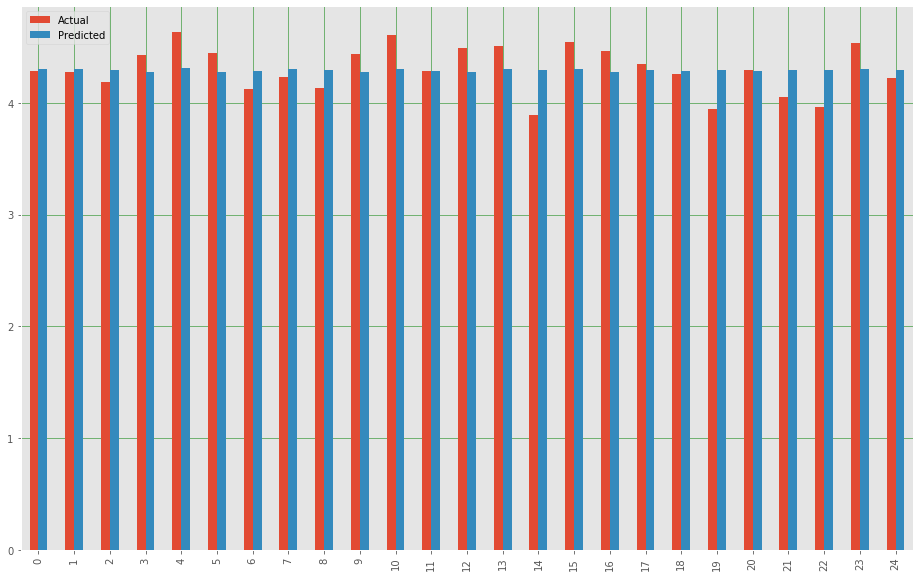

In [782]:
#Visualing Actual data vs Prediction using bar graph.

df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#I would say that the prediction is quite accurate. All of them are almost the same level as shown below.

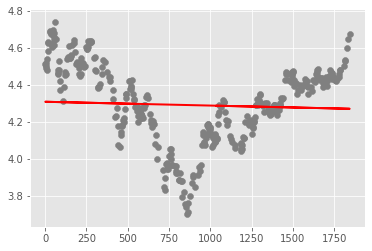

In [783]:
#Below prints the straight line we created:
plt.scatter ( X_test, y_test,  color='gray' )
plt.plot ( X_test, y_pred, color='red', linewidth=2 )
plt.show ()

In [784]:
close_px = dfStock1.close
mavg = close_px.rolling(window=100).mean()

print ( mavg.tail() )

#The rolling mean is what I calculated below. It smooths out price data by
#creating a constantly updated average price. This is useful to cut down noise
#in the closing price. Moving average also acts as resistance meaning that
#the increase and decrease in prices of stocks would be expected to follow the
#trend and less likely to deviate from the resistance point.
#Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

1851    92.7010
1852    92.8510
1853    93.0160
1854    93.1795
1855    93.3480
Name: close, dtype: float64


In [785]:
#I would say that the error rating is quite low so the algorithm
#should be good enough to make predictions for closing prices.
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1737147903718916
Mean Squared Error: 0.044730288833819076
Root Mean Squared Error: 0.2114953636225132


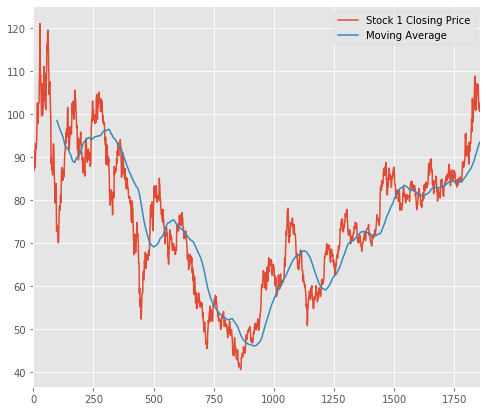

In [786]:
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

#Using moving average to visualize the closing prices.
close_px.plot(label='Stock 1 Closing Price')
mavg.plot(label='Moving Average')
plt.legend()
#Should buy when stock price is down. In this case, the closing price is down
#most of the time so it should be affordable. Furthermore, the prices start
#to rise after day 750-850 so it should be profitable.

#### Return Deviation — to determine risk and return

    * Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.
    
    * Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
    
    * Below shows the graph of stock 1's closing price. If you want this stock then you have to account 2 things. Stablility of stock and high price. It seems the stock is not very stable. Around day 0-250 there are 2 huge drops in price and around day 500 there is another huge drop in price. But if you are less risk averse then go ahead and buy it because there were only 3 large drops in 1856 days which is quite good! 

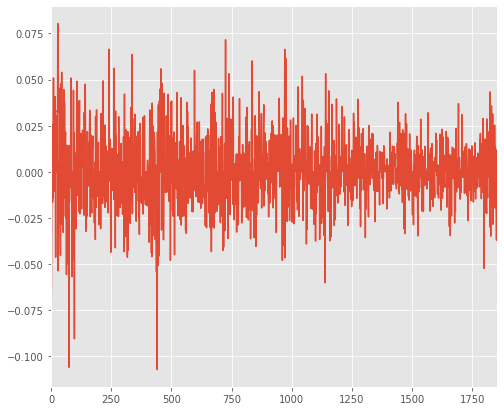

In [787]:
rets = close_px / close_px.shift(1) - 1
rets.plot(label='return')

### Stock 11 Modelling starts here:

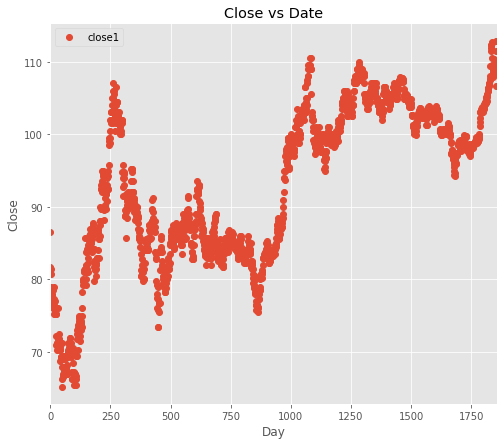

In [788]:
#Here we plot the graph regarding Close vs Date. I plotted it just
#just to see if we can find any correlation between the Close and Date.

dfStock11.plot( x='day', y='close1', style='o' )  
plt.title('Close vs Date')  
plt.xlabel('Day')  
plt.ylabel('Close')  
plt.show()

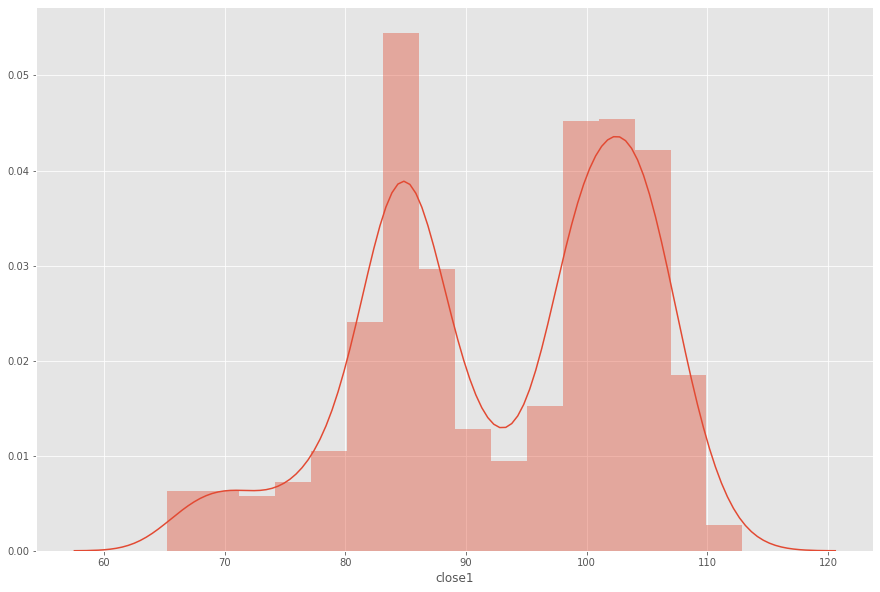

In [789]:
#Here we check the average max closing price which is around 80-110.
plt.figure( 7, figsize = ( 15, 10 ) )
plt.tight_layout ()
seabornInstance.distplot ( dfStock11 [ 'close1' ] )

In [790]:
#Dividing data into attributes and labels.
#Attributes are independent variables and labels are dependent variables.

X11 = dfStock11['day'].values.reshape(-1,1) #Independent vriable is day so stored in X axis.
y11 = stock11CloseTarget.values.reshape(-1,1) #Dependent variable is closing price so stored in Y axis.

X11_train, X11_test, y11_train, y11_test = train_test_split( X11, y11, test_size = 0.2, random_state = 0 ) #Split data into 80% training and 20% testing data.

regressor11 = LinearRegression () #Instantiate the algorithm.
regressor11.fit(X11_train, y11_train) #Training the algorithm.

#Below shows the intercept needed to get the best fit line for the data.
print( regressor11.intercept_ )#For retrieving the slope:
#Below shows the gradient needed to get the best fit line for the data.
print( regressor11.coef_ )

#The results are 4.309 for intercept and -2.04873897e-05 for gradient.
#This means that for every day, the cahnge to the closing price is -2.04873897e-05%.

#Comparing actual data to the predicted data to see how accurate the prediction is.
y11_pred = regressor11.predict(X11_test)
df11 = pd.DataFrame({'Actual': y11_test.flatten(), 'Predicted': y11_pred.flatten()})
df



[4.36547549]
[[0.00017191]]


,Actual,Predicted
0,4.280132,4.297811
1,4.273188,4.300105
2,4.185860,4.288796
3,4.424847,4.278163
4,4.629863,4.308628
...,...,...
367,4.436160,4.273021
368,4.293878,4.282650
369,4.412798,4.274517
370,4.307438,4.286809


<Figure size 576x504 with 0 Axes>

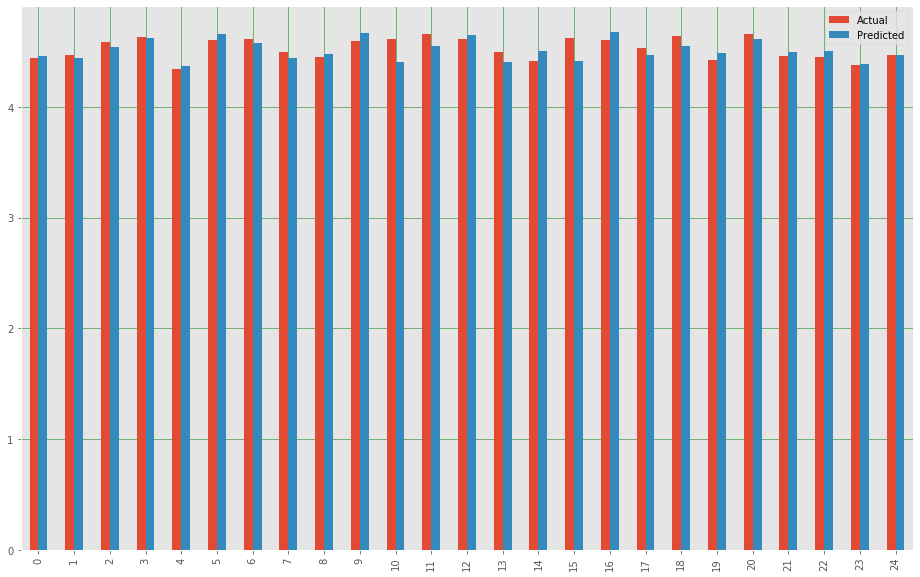

In [791]:
#Visualing Actual data vs Prediction using bar graph.

plt.figure ( 8 )
df11 = df11.head(25)
df11.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#I would say that the prediction is quite accurate. All of them are almost the same level as shown below.

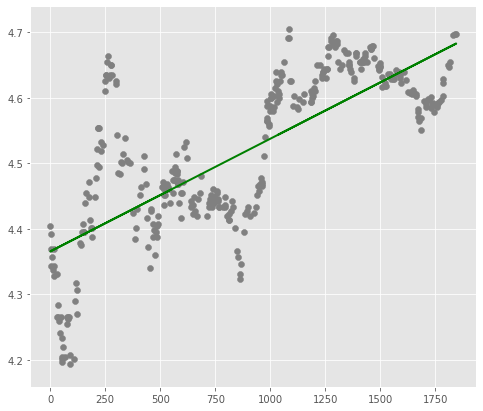

In [792]:
#Below prints the straight line we created:
plt.scatter ( X11_test, y11_test,  color='gray' )
plt.plot ( X11_test, y11_pred, color='green', linewidth=2 )
plt.show ()

In [793]:
close_px11 = dfStock11.close1
mavg11 = close_px11.rolling(window=100).mean()

print ( mavg11.tail() )

#The rolling mean is what I calculated below. It smooths out price data by
#creating a constantly updated average price. This is useful to cut down noise
#in the closing price. Moving average also acts as resistance meaning that
#the increase and decrease in prices of stocks would be expected to follow the
#trend and less likely to deviate from the resistance point.
#Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

1851    103.9525
1852    104.0570
1853    104.1880
1854    104.3335
1855    104.4815
Name: close1, dtype: float64


In [794]:
#I would say that the error rating is quite low so the algorithm
#should be good enough to make predictions for closing prices.
print('Mean Absolute Error:', metrics.mean_absolute_error(y11_test, y11_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y11_test, y11_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y11_test, y11_pred)))

Mean Absolute Error: 0.06340717569818746
Mean Squared Error: 0.006505600948236784
Root Mean Squared Error: 0.08065730560982547


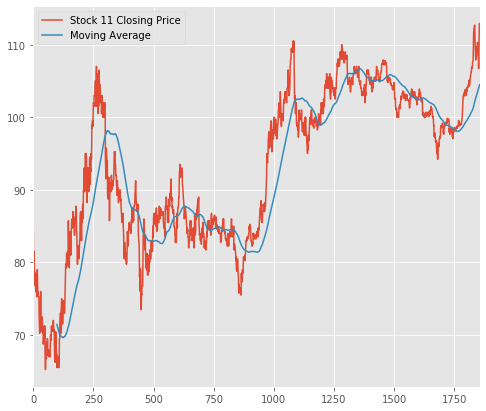

In [795]:
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

#Using moving average to visualize the closing prices.
close_px11.plot(label='Stock 11 Closing Price')
mavg11.plot(label='Moving Average')
plt.legend()
#Should buy when stock price is down. In this case, the closing price is down
#in the first half so it should be affordable during that time. Furthermore, the prices start
#to rise after day 750-1250 so it should be profitable.

#### Return Deviation — to determine risk and return

    * Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.
    
    * Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
    
    * Below shows the graph of stock 1's closing price. If you want this stock then you have to account 2 things. Stablility of stock and high price. It seems the stock is not very stable. Around day 0-500 there are 3 huge drops in price and around day 500-1250 there are other drops in the price. However, comparing it with stock 1, seems like this stock is better. The highs are not as high as stock 1, but the lows are not as low as stock 1. This stock is also more stable than stock 1. From the moving average above, it keeps going up and  keeps going up more than stock 1's moving average. If you want to profit with low risk then use stock 11 compared to stock 1, but risk and reward is more in stock 1 than 11.
    
    * From the Linear Regression model, we find out that the gradient is very positive. It means that this stock is profitable and thus you should buy it. The Linear Regression model is shown below. [[-2.04873897e-05]] (Stock 1's gradient) vs [[0.00017191]] (Stock 11's gradient). Clearly postive gradient is bigger than negative gradient. Stock 11 is more profitable.

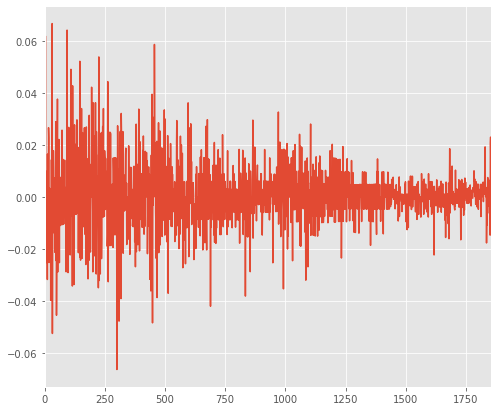

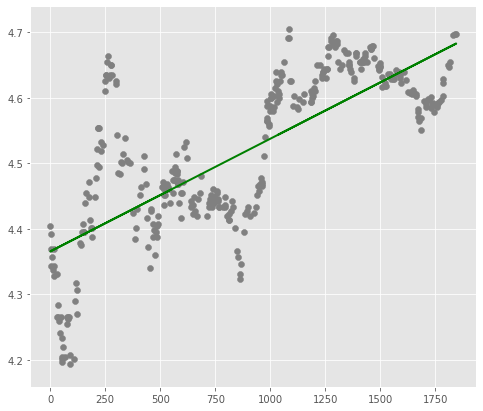

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [796]:
rets11 = close_px11 / close_px11.shift(1) - 1
rets11.plot(label='return')

#Line gradient of linear regression very positive:
#Means it is profitable.
plt.figure (2)
plt.scatter ( X11_test, y11_test,  color='gray' )
plt.plot ( X11_test, y11_pred, color='green', linewidth=2 )
plt.show ()

plt.figure( figsize = ( 15, 10 ) )


### Stock 293 Modelling starts here:

<Figure size 1080x720 with 0 Axes>

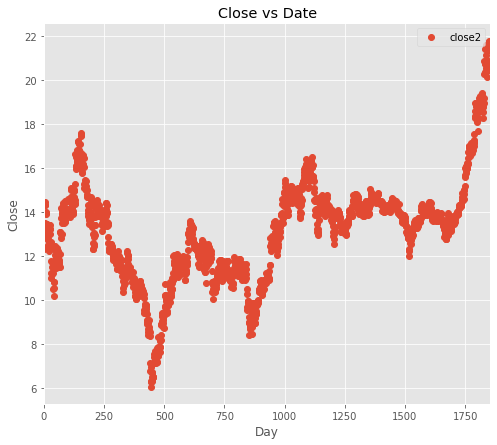

In [839]:
#Here we plot the graph regarding Close vs Date. I plotted it just
#just to see if we can find any correlation between the Close and Date.

plt.figure( 293, figsize = ( 15, 10 ) )
dfStock293.plot( x='day', y='close2', style='o' )  
plt.title('Close vs Date')  
plt.xlabel('Day')  
plt.ylabel('Close')  
plt.show()

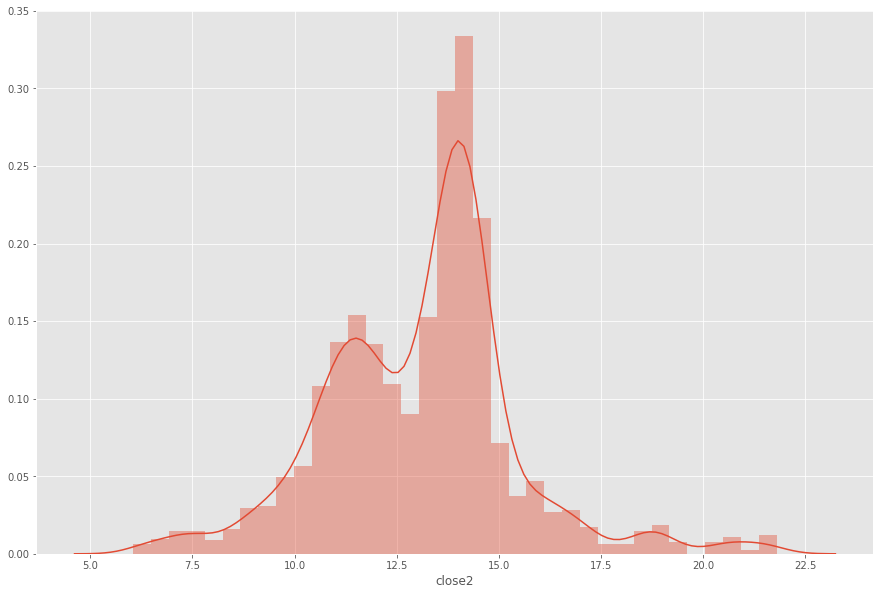

In [798]:
#Here we check the average max closing price which is around 12.5-15.0.
plt.figure( 293, figsize = ( 15, 10 ) )
plt.tight_layout ()
seabornInstance.distplot ( dfStock293 [ 'close2' ] )

In [799]:
#Dividing data into attributes and labels.
#Attributes are independent variables and labels are dependent variables.

X293 = dfStock293['day'].values.reshape(-1,1) #Independent vriable is day so stored in X axis.
y293 = stock293CloseTarget.values.reshape(-1,1) #Dependent variable is closing price so stored in Y axis.

X293_train, X293_test, y293_train, y293_test = train_test_split( X293, y293, test_size = 0.2, random_state = 0 ) #Split data into 80% training and 20% testing data.

regressor293= LinearRegression () #Instantiate the algorithm.
regressor293.fit(X293_train, y293_train) #Training the algorithm.

#Below shows the intercept needed to get the best fit line for the data.
print( regressor293.intercept_ )#For retrieving the slope:
#Below shows the gradient needed to get the best fit line for the data.
print( regressor293.coef_ )

#The results are 4.309 for intercept and -2.04873897e-05 for gradient.
#This means that for every day, the cahnge to the closing price is -2.04873897e-05%.

#Comparing actual data to the predicted data to see how accurate the prediction is.
y293_pred = regressor293.predict(X293_test)
df293 = pd.DataFrame({'Actual': y293_test.flatten(), 'Predicted': y293_pred.flatten()})
df



[2.3972237]
[[0.00017122]]


,Actual,Predicted
0,4.280132,4.297811
1,4.273188,4.300105
2,4.185860,4.288796
3,4.424847,4.278163
4,4.629863,4.308628
...,...,...
367,4.436160,4.273021
368,4.293878,4.282650
369,4.412798,4.274517
370,4.307438,4.286809


<Figure size 1080x720 with 0 Axes>

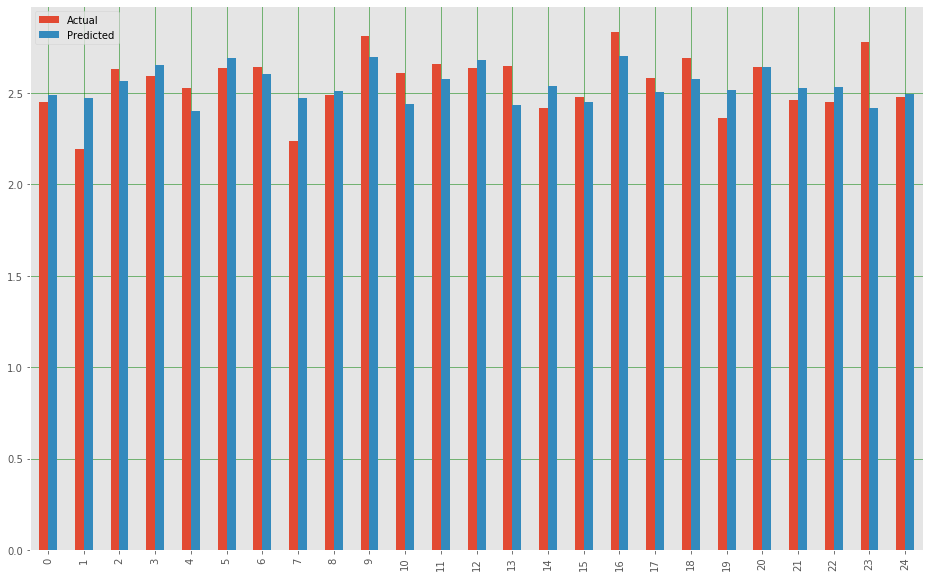

In [800]:
#Visualing Actual data vs Prediction using bar graph.

plt.figure ( 293, figsize = ( 15, 10 ) )
df293 = df293.head(25)
df293.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#I would say that the prediction is quite accurate. All of them are almost the same level as shown below.

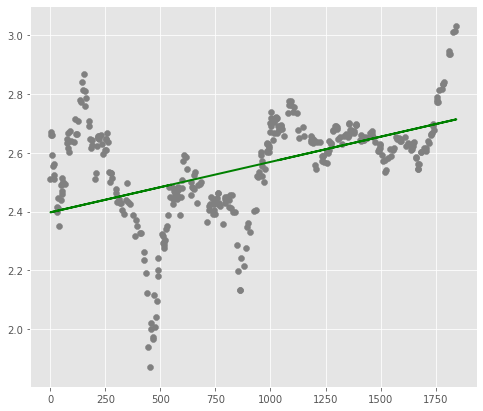

In [801]:
#Below prints the straight line we created:
plt.scatter ( X293_test, y293_test,  color='gray' )
plt.plot ( X293_test, y293_pred, color='green', linewidth=2 )
plt.show ()

In [802]:
close_px293 = dfStock293.close2
mavg293 = close_px293.rolling(window=100).mean()

print ( mavg293.tail() )

#The rolling mean is what I calculated below. It smooths out price data by
#creating a constantly updated average price. This is useful to cut down noise
#in the closing price. Moving average also acts as resistance meaning that
#the increase and decrease in prices of stocks would be expected to follow the
#trend and less likely to deviate from the resistance point.
#Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

1851    18.4441
1852    18.4977
1853    18.5549
1854    18.6101
1855    18.6631
Name: close2, dtype: float64


In [803]:
#I would say that the error rating is quite low so the algorithm
#should be good enough to make predictions for closing prices.
#If you look at the root mean squared, it is quite low.
print('Mean Absolute Error:', metrics.mean_absolute_error(y293_test, y293_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y11_test, y293_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y293_test, y293_pred)))

Mean Absolute Error: 0.11446165551373026
Mean Squared Error: 3.899158650962746
Root Mean Squared Error: 0.1580663697199677


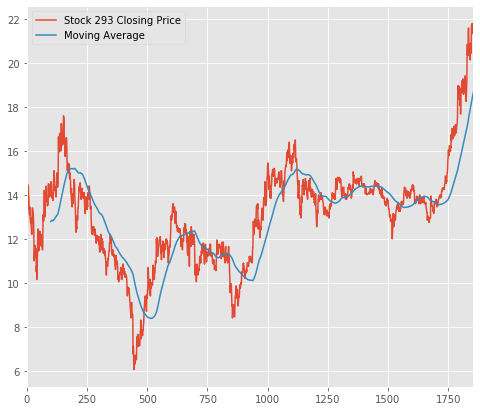

In [804]:
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

#Using moving average to visualize the closing prices.
close_px293.plot(label='Stock 293 Closing Price')
mavg293.plot(label='Moving Average')
plt.legend()
#Should buy when stock price is down. In this case, the closing price is down
#in the first half so it should be affordable during that time. Furthermore, the prices start
#to rise after day 750-1250 so it should be profitable.

#### Return Deviation — to determine risk and return

    * Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.
    
    * Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
    
    * Below shows the graph of stock 293's closing price. If you want this stock then you have to account 2 things. Stablility of stock and high price. It seems this stock is somewhat stable, but around day 250-500 there is a huge drop in price. At least it is more stable than the return deviation graph in stock 1 and stock 11. Stock 293's return deviation graph shows that the maximum low is more than the maximum high. However, comparing it with stock 1, seems like this stock is better. The highs are not as high as stock 1, but the lows are not as low as stock 1. This stock is also more stable than stock 1. From the moving average above, it keeps going up and  keeps going up more than stock 1's moving average. If you want to profit with low risk then use stock 11 compared to stock 1, but risk and reward is more in stock 1 than 293. 
    
    * From the Linear Regression model, we find out that the gradient is positive. It means that this stock is profitable and thus you should buy it. The Linear Regression model is shown below. [[-2.04873897e-05]] (Stock 1's gradient) vs [[0.00017191]] (Stock 11's gradient) vs Stock 293's gradient [[0.00017122]]. Stock 293 has a gradient smaller than stock 11, but bigger than stock 1. Therefore, Stock 293 is more profitable than stock 1, but less profitable than stock 11.

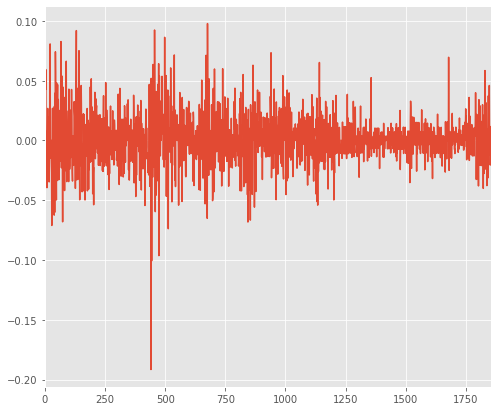

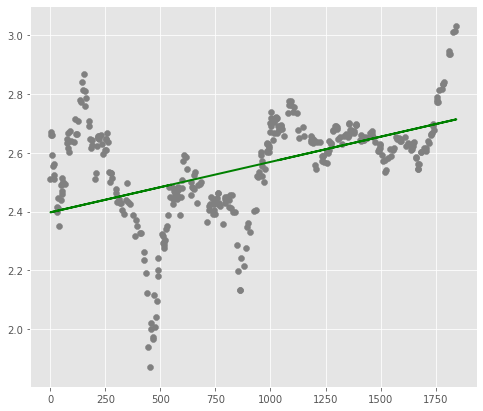

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [805]:
rets293 = close_px293 / close_px293.shift(1) - 1
rets293.plot(label='return')

#Line gradient of linear regression very positive:
#Means it is profitable.
plt.figure (3)
plt.scatter ( X293_test, y293_test,  color='gray' )
plt.plot ( X293_test, y293_pred, color='green', linewidth=2 )
plt.show ()

plt.figure( figsize = ( 15, 10 ) )


### Stock 857 Modelling starts here:

<Figure size 1080x720 with 0 Axes>

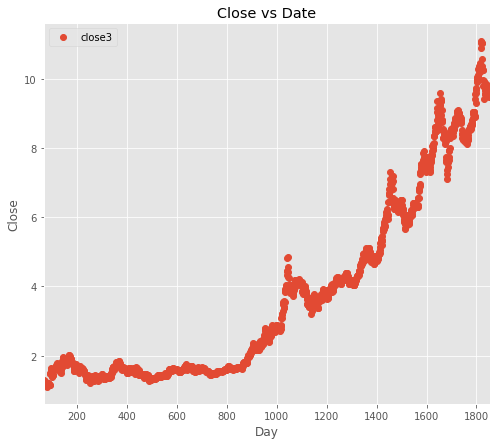

In [806]:
#Here we plot the graph regarding Close vs Date. I plotted it just
#just to see if we can find any correlation between the Close and Date.

plt.figure( 857, figsize = ( 15, 10 ) )
dfStock857.plot( x='day', y='close3', style='o' )  
plt.title('Close vs Date')  
plt.xlabel('Day')  
plt.ylabel('Close')  
plt.show()

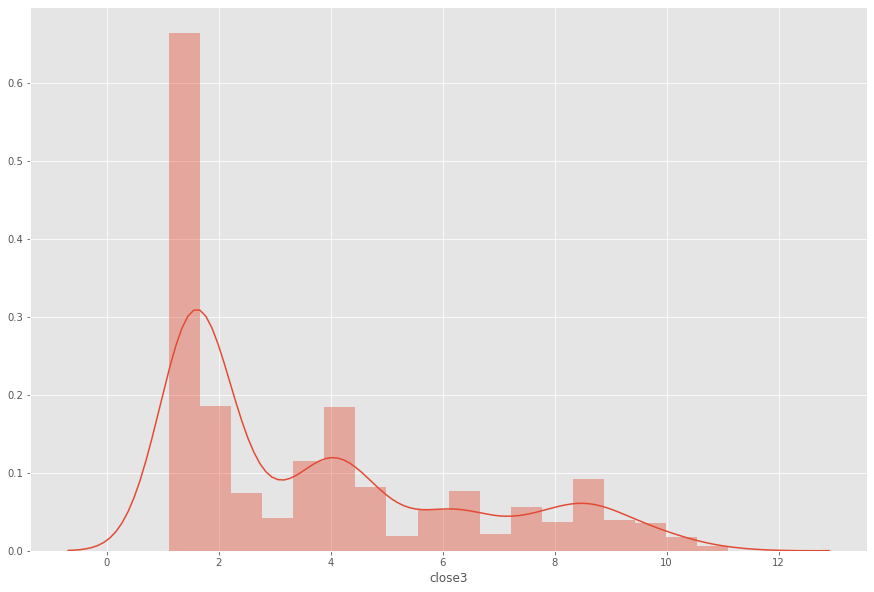

In [807]:
#Here we check the average max closing price which is around 12.5-15.0.
plt.figure( 857, figsize = ( 15, 10 ) )
plt.tight_layout ()
seabornInstance.distplot ( dfStock857 [ 'close3' ] )

In [808]:
#Dividing data into attributes and labels.
#Attributes are independent variables and labels are dependent variables.

X857 = dfStock857['day'].values.reshape(-1,1) #Independent vriable is day so stored in X axis.
y857 = stock857CloseTarget.values.reshape(-1,1) #Dependent variable is closing price so stored in Y axis.

X857_train, X857_test, y857_train, y857_test = train_test_split( X857, y857, test_size = 0.2, random_state = 0 ) #Split data into 80% training and 20% testing data.

regressor857= LinearRegression () #Instantiate the algorithm.
regressor857.fit(X857_train, y857_train) #Training the algorithm.

#Below shows the intercept needed to get the best fit line for the data.
print( regressor857.intercept_ )#For retrieving the slope:
#Below shows the gradient needed to get the best fit line for the data.
print( regressor857.coef_ )

#The results are 4.309 for intercept and -2.04873897e-05 for gradient.
#This means that for every day, the cahnge to the closing price is -2.04873897e-05%.

#Comparing actual data to the predicted data to see how accurate the prediction is.
y857_pred = regressor857.predict(X857_test)
df857 = pd.DataFrame({'Actual': y857_test.flatten(), 'Predicted': y857_pred.flatten()})
df



[-0.11457241]
[[0.00124283]]


,Actual,Predicted
0,4.280132,4.297811
1,4.273188,4.300105
2,4.185860,4.288796
3,4.424847,4.278163
4,4.629863,4.308628
...,...,...
367,4.436160,4.273021
368,4.293878,4.282650
369,4.412798,4.274517
370,4.307438,4.286809


<Figure size 1080x720 with 0 Axes>

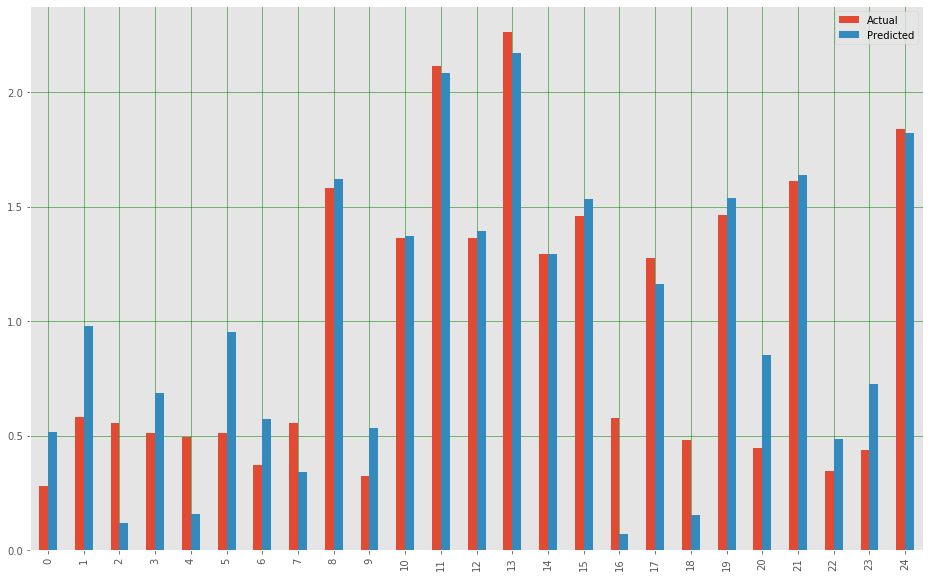

In [809]:
#Visualing Actual data vs Prediction using bar graph.

plt.figure ( 857, figsize = ( 15, 10 ) )
df857 = df857.head(25)
df857.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#The predictions are not as accurate for stock 857 (this stock) than the other stocks.

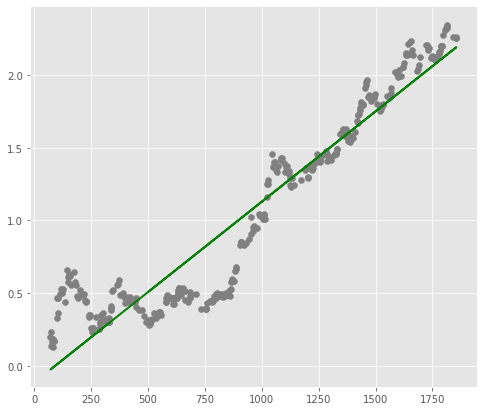

In [810]:
#Below prints the straight line we created:
plt.scatter ( X857_test, y857_test,  color='gray' )
plt.plot ( X857_test, y857_pred, color='green', linewidth=2 )
plt.show ()

In [811]:
close_px857 = dfStock857.close3
mavg857 = close_px857.rolling(window=100).mean()

print ( mavg857.tail() )

#The rolling mean is what I calculated below. It smooths out price data by
#creating a constantly updated average price. This is useful to cut down noise
#in the closing price. Moving average also acts as resistance meaning that
#the increase and decrease in prices of stocks would be expected to follow the
#trend and less likely to deviate from the resistance point.
#Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

1783    9.3667
1784    9.3784
1785    9.3911
1786    9.4042
1787    9.4178
Name: close3, dtype: float64


In [812]:
#I would say that the error rating is quite low so the algorithm
#should be good enough to make predictions for closing prices.
#If you look at the root mean squared, it is quite low.
print('Mean Absolute Error:', metrics.mean_absolute_error(y857_test, y857_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y857_test, y857_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y857_test, y857_pred)))

Mean Absolute Error: 0.16553299759569517
Mean Squared Error: 0.04603680938567387
Root Mean Squared Error: 0.2145619010581186


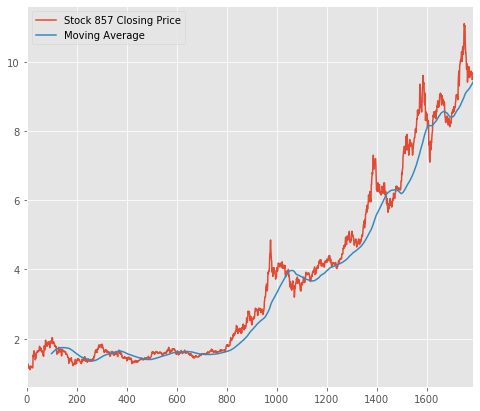

In [813]:
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

#Using moving average to visualize the closing prices.
close_px857.plot(label='Stock 857 Closing Price')
mavg857.plot(label='Moving Average')
plt.legend()
#Should buy this stock early so that you can profit. The price keeps going up and thus
#this stock seems like a profitable stock as I can only see rise in closing price below.

#### Return Deviation — to determine risk and return

    * Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.
    
    * Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
    
    * Below shows the graph of stock 857's closing price. If you want this stock then you have to account 2 things. Stablility of stock and high price. It seems this stock is very stable. I say stable because there are no major dips and only a huge profit at around day 0. Comparing with the other stocks, this stock is stable. The lows in this stock are not as low as the highs and the lows are not as low as the other stocks. Moreover, the stock is only profitable in one moment in time near day 0 where the closing price sky rocketed by 0.30 which is more than the other stocks. However, due to the stability of this stock, the risk and reward is quite low because it is so stable.
    
    * From the Linear Regression model, we find out that the gradient is positive. It means that this stock is profitable and thus you should buy it. The Linear Regression model is shown below. [[-2.04873897e-05]] (Stock 1's gradient) vs [[0.00017191]] (Stock 11's gradient) vs Stock 293's gradient [[0.00017122]] vs Stock 857's gradient [[0.00124283]]. Stock 857 has the greatest gradient and therefore it proves to be the most profitable for the price if you buy this stock.

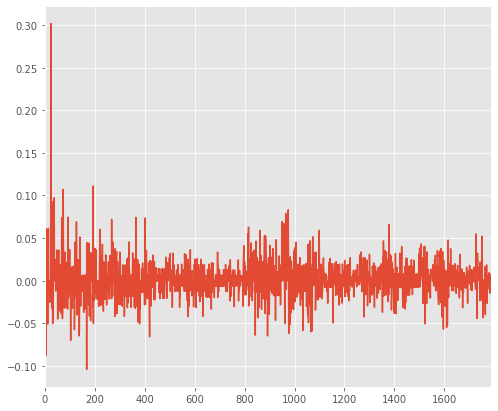

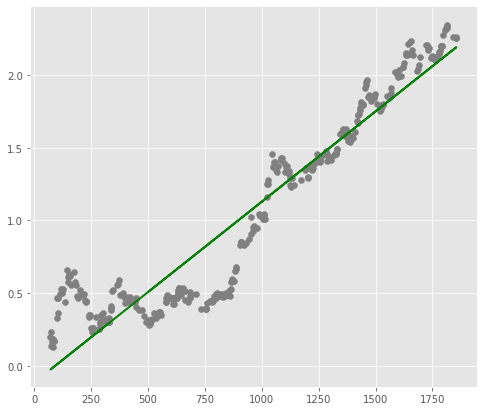

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [814]:
rets857 = close_px857 / close_px857.shift(1) - 1
rets857.plot(label='return')

#Line gradient of linear regression very positive:
#Means it is profitable.
plt.figure (3)
plt.scatter ( X857_test, y857_test,  color='gray' )
plt.plot ( X857_test, y857_pred, color='green', linewidth=2 )
plt.show ()

plt.figure( figsize = ( 15, 10 ) )


### Stock 13 Modelling starts here:

<Figure size 1080x720 with 0 Axes>

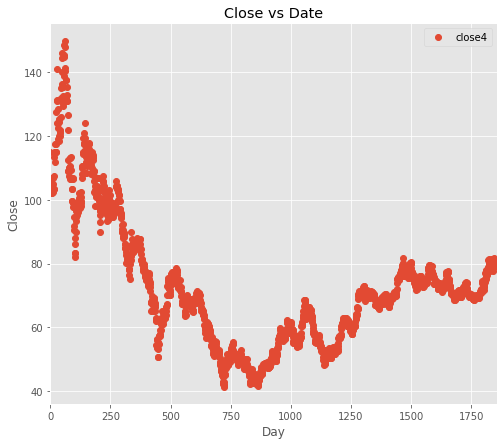

In [815]:
#Here we plot the graph regarding Close vs Date. I plotted it just
#just to see if we can find any correlation between the Close and Date.

plt.figure( 13, figsize = ( 15, 10 ) )
dfStock13.plot( x='day', y='close4', style='o' )  
plt.title('Close vs Date')  
plt.xlabel('Day')  
plt.ylabel('Close')  
plt.show()

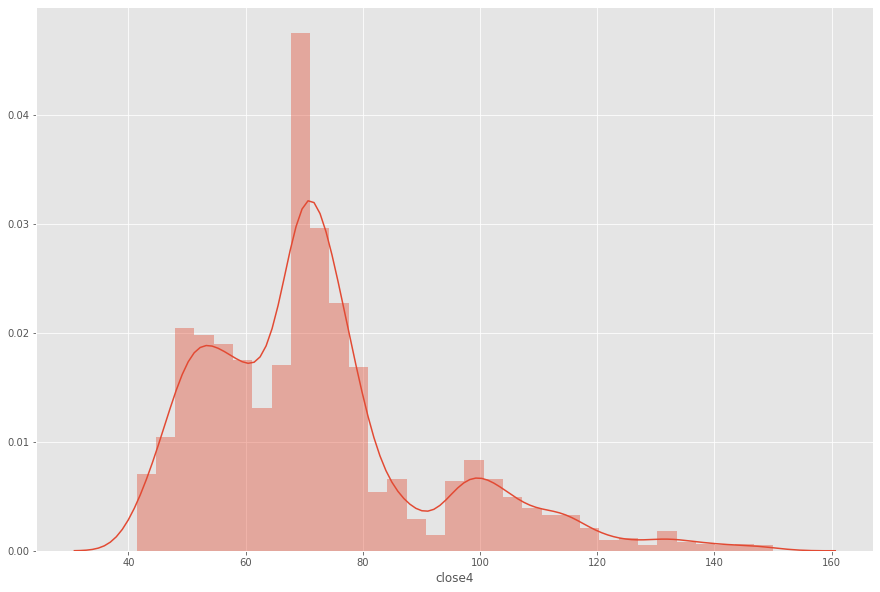

In [816]:
#Here we check the average max closing price which is around 12.5-15.0.
plt.figure( 13, figsize = ( 15, 10 ) )
plt.tight_layout ()
seabornInstance.distplot ( dfStock13 [ 'close4' ] )

In [817]:
#Dividing data into attributes and labels.
#Attributes are independent variables and labels are dependent variables.

X13 = dfStock13['day'].values.reshape(-1,1) #Independent vriable is day so stored in X axis.
y13 = stock13CloseTarget.values.reshape(-1,1) #Dependent variable is closing price so stored in Y axis.

X13_train, X13_test, y13_train, y13_test = train_test_split( X13, y13, test_size = 0.2, random_state = 0 ) #Split data into 80% training and 20% testing data.

regressor13= LinearRegression () #Instantiate the algorithm.
regressor13.fit(X13_train, y13_train) #Training the algorithm.

#Below shows the intercept needed to get the best fit line for the data.
print( regressor13.intercept_ )#For retrieving the slope:
#Below shows the gradient needed to get the best fit line for the data.
print( regressor13.coef_ )

#The results are 4.309 for intercept and -2.04873897e-05 for gradient.
#This means that for every day, the cahnge to the closing price is -2.04873897e-05%.

#Comparing actual data to the predicted data to see how accurate the prediction is.
y13_pred = regressor13.predict(X13_test)
df13 = pd.DataFrame({'Actual': y13_test.flatten(), 'Predicted': y13_pred.flatten()})
df



[4.38879821]
[[-0.00015916]]


,Actual,Predicted
0,4.280132,4.297811
1,4.273188,4.300105
2,4.185860,4.288796
3,4.424847,4.278163
4,4.629863,4.308628
...,...,...
367,4.436160,4.273021
368,4.293878,4.282650
369,4.412798,4.274517
370,4.307438,4.286809


<Figure size 1080x720 with 0 Axes>

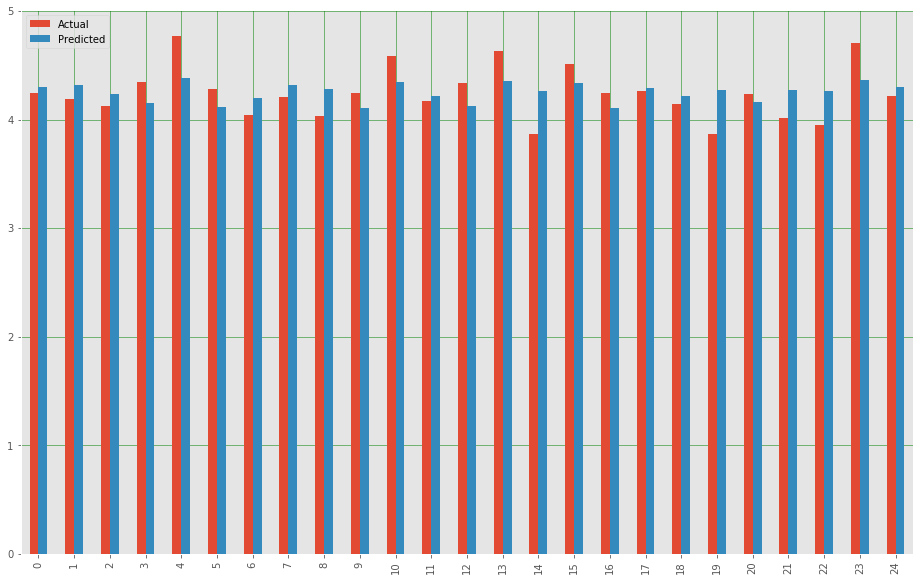

In [818]:
#Visualing Actual data vs Prediction using bar graph.

plt.figure ( 13, figsize = ( 15, 10 ) )
df13 = df13.head(25)
df13.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#I would say that the prediction is quite accurate. All of them are almost the same level as shown below.

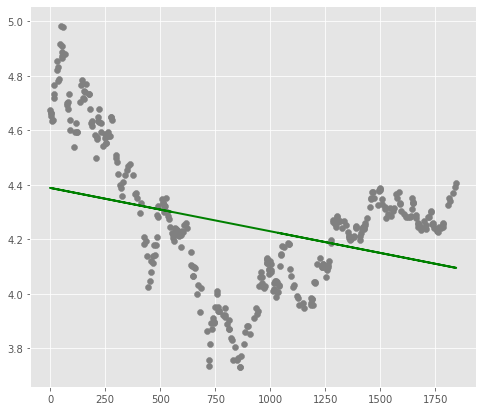

In [819]:
#Below prints the straight line we created:
plt.scatter ( X13_test, y13_test,  color='gray' )
plt.plot ( X13_test, y13_pred, color='green', linewidth=2 )
plt.show ()

In [820]:
close_px13 = dfStock13.close4
mavg13 = close_px13.rolling(window=100).mean()

print ( mavg13.tail() )

#The rolling mean is what I calculated below. It smooths out price data by
#creating a constantly updated average price. This is useful to cut down noise
#in the closing price. Moving average also acts as resistance meaning that
#the increase and decrease in prices of stocks would be expected to follow the
#trend and less likely to deviate from the resistance point.
#Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

1851    74.4340
1852    74.5255
1853    74.6190
1854    74.7155
1855    74.8215
Name: close4, dtype: float64


In [821]:
#I would say that the error rating is quite low so the algorithm
#should be good enough to make predictions for closing prices.
#If you look at the root mean squared, it is quite low.
print('Mean Absolute Error:', metrics.mean_absolute_error(y13_test, y13_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y13_test, y13_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y13_test, y13_pred)))

Mean Absolute Error: 0.19741317148334467
Mean Squared Error: 0.05516018644112895
Root Mean Squared Error: 0.2348620583260075


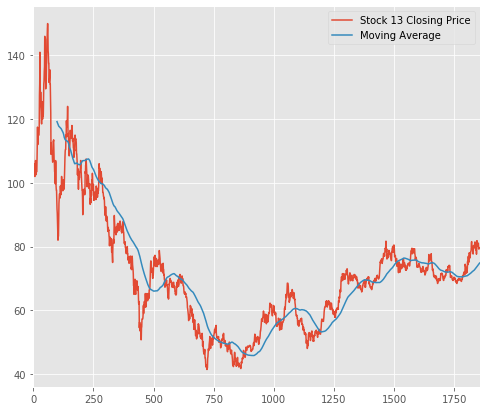

In [822]:
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

#Using moving average to visualize the closing prices.
close_px13.plot(label='Stock 13 Closing Price')
mavg13.plot(label='Moving Average')
plt.legend()
#Should buy this stock early so that you can profit. The price keeps going up and thus
#this stock seems like a profitable stock as I can only see rise in closing price below.

#### Return Deviation — to determine risk and return

    * Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.
    
    * Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
    
    * Below shows the graph of stock 13's closing price. If you want this stock then you have to account 2 things. Stablility of stock and high price. It seems that the stock is somewhat more unstable than the others stocks. The highs and lows are unpredictable and high in frequency making it more unstable than the other stocks. It has 2 crashes in closing price within day 0-500. The highs in this stock is outweighed from the lows in this stock. Thus I suggest getting a more stable stock if you are more risk averse.
    
    * From the Linear Regression model, we find out that the gradient is negative. It means that the stock is not profitable. The Linear Regression model is shown below. [[-2.04873897e-05]] (Stock 1's gradient) vs [[0.00017191]] (Stock 11's gradient) vs Stock 293's gradient [[0.00017122]] vs Stock 857's gradient [[0.00124283]] vs Stock 13's gradient [[-0.00015916]]. Stock 13 has the greatest negative gradient thus making it not worth investing.

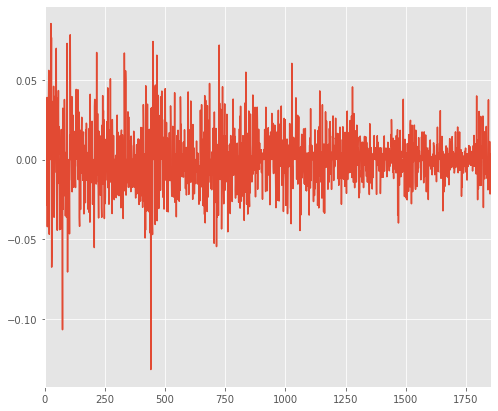

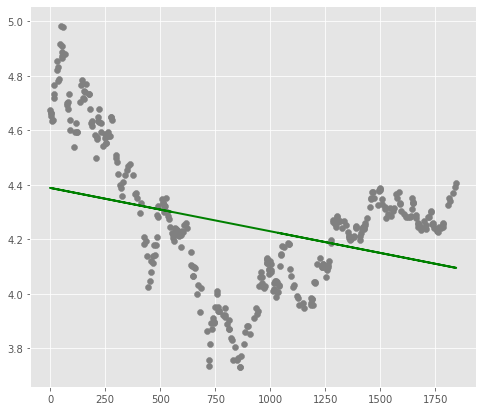

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [823]:
rets13 = close_px13 / close_px13.shift(1) - 1
rets13.plot(label='return')

#Line gradient of linear regression very positive:
#Means it is profitable.
plt.figure (3)
plt.scatter ( X13_test, y13_test,  color='gray' )
plt.plot ( X13_test, y13_pred, color='green', linewidth=2 )
plt.show ()

plt.figure( figsize = ( 15, 10 ) )


### Stock 23 Modelling starts here:

<Figure size 1080x720 with 0 Axes>

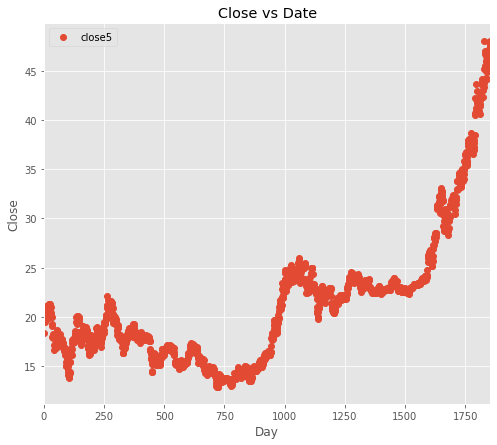

In [824]:
#Here we plot the graph regarding Close vs Date. I plotted it just
#just to see if we can find any correlation between the Close and Date.

plt.figure( 23, figsize = ( 15, 10 ) )
dfStock23.plot( x='day', y='close5', style='o' )  
plt.title('Close vs Date')  
plt.xlabel('Day')  
plt.ylabel('Close')  
plt.show()

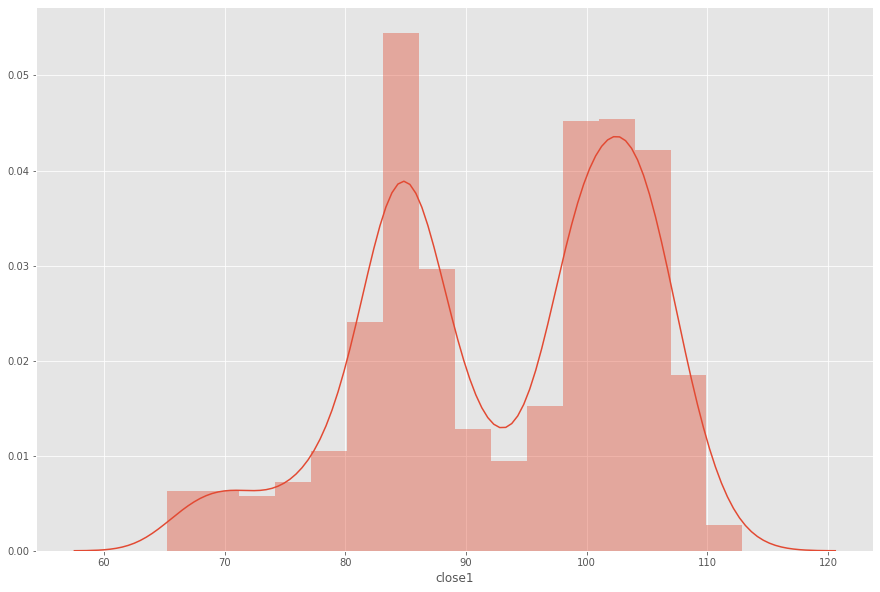

In [825]:
#Here we check the average max closing price which is around 80-110.
plt.figure( 23, figsize = ( 15, 10 ) )
plt.tight_layout ()
seabornInstance.distplot ( dfStock11 [ 'close1' ] )

In [826]:
#Dividing data into attributes and labels.
#Attributes are independent variables and labels are dependent variables.

X23 = dfStock23['day'].values.reshape(-1,1) #Independent vriable is day so stored in X axis.
y23 = stock23CloseTarget.values.reshape(-1,1) #Dependent variable is closing price so stored in Y axis.

X23_train, X23_test, y23_train, y23_test = train_test_split( X23, y23, test_size = 0.2, random_state = 0 ) #Split data into 80% training and 20% testing data.

regressor23= LinearRegression () #Instantiate the algorithm.
regressor23.fit(X23_train, y23_train) #Training the algorithm.

#Below shows the intercept needed to get the best fit line for the data.
print( regressor23.intercept_ )#For retrieving the slope:
#Below shows the gradient needed to get the best fit line for the data.
print( regressor23.coef_ )

#The results are 4.309 for intercept and -2.04873897e-05 for gradient.
#This means that for every day, the cahnge to the closing price is -2.04873897e-05%.

#Comparing actual data to the predicted data to see how accurate the prediction is.
y23_pred = regressor23.predict(X23_test)
df23 = pd.DataFrame({'Actual': y23_test.flatten(), 'Predicted': y23_pred.flatten()})
df



[2.64446363]
[[0.00040327]]


,Actual,Predicted
0,4.280132,4.297811
1,4.273188,4.300105
2,4.185860,4.288796
3,4.424847,4.278163
4,4.629863,4.308628
...,...,...
367,4.436160,4.273021
368,4.293878,4.282650
369,4.412798,4.274517
370,4.307438,4.286809


<Figure size 1080x720 with 0 Axes>

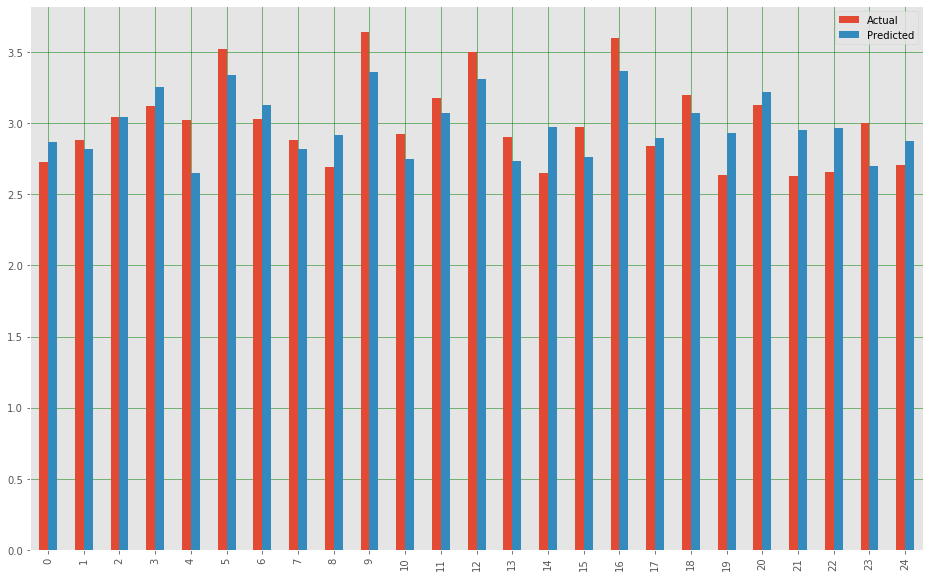

In [827]:
#Visualing Actual data vs Prediction using bar graph.

plt.figure ( 23, figsize = ( 15, 10 ) )
df23 = df23.head(25)
df23.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

#I would say that the prediction is quite accurate. All of them are almost the same level as shown below.

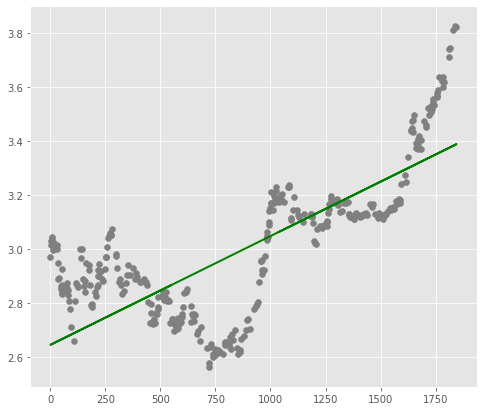

In [828]:
#Below prints the straight line we created:
plt.scatter ( X23_test, y23_test,  color='gray' )
plt.plot ( X23_test, y23_pred, color='green', linewidth=2 )
plt.show ()

In [829]:
close_px23 = dfStock23.close5
mavg23 = close_px23.rolling(window=100).mean()

print ( mavg23.tail() )

#The rolling mean is what I calculated below. It smooths out price data by
#creating a constantly updated average price. This is useful to cut down noise
#in the closing price. Moving average also acts as resistance meaning that
#the increase and decrease in prices of stocks would be expected to follow the
#trend and less likely to deviate from the resistance point.
#Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7

1851    41.0910
1852    41.1950
1853    41.3105
1854    41.4315
1855    41.5565
Name: close5, dtype: float64


In [830]:
#I would say that the error rating is quite low so the algorithm
#should be good enough to make predictions for closing prices.
#If you look at the root mean squared, it is quite low.
print('Mean Absolute Error:', metrics.mean_absolute_error(y23_test, y23_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y23_test, y23_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y23_test, y23_pred)))

Mean Absolute Error: 0.15081981064088545
Mean Squared Error: 0.03365169515647828
Root Mean Squared Error: 0.18344398370205078


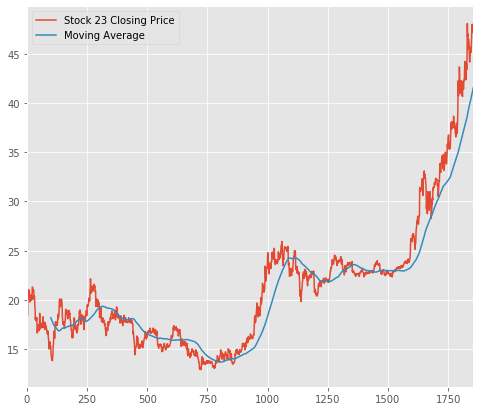

In [831]:
# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

#Using moving average to visualize the closing prices.
close_px23.plot(label='Stock 23 Closing Price')
mavg23.plot(label='Moving Average')
plt.legend()
#Should buy this stock early so that you can profit. The price keeps going up and thus
#this stock seems like a profitable stock as I can only see rise in closing price below.

#### Return Deviation — to determine risk and return

    * Expected Return measures the mean, or expected value, of the probability distribution of investment returns. The expected return of a portfolio is calculated by multiplying the weight of each asset by its expected return and adding the values for each investment — Investopedia.
    
    * Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
    
    * Below shows the graph of stock 13's closing price. If you want this stock then you have to account 2 things. Stablility of stock and high price. The stock seems somewhat stable. The highs and the lows cancel out each other most of the time. However, there are many moments where the highs outweigh the lows which is a good sign that and thus it is profitable.
    
    * From the Linear Regression model, we find out that the gradient is negative. It means that the stock is not profitable. The Linear Regression model is shown below. [[-2.04873897e-05]] (Stock 1's gradient) vs [[0.00017191]] (Stock 11's gradient) vs Stock 293's gradient [[0.00017122]] vs Stock 857's gradient [[0.00124283]] vs Stock 13's gradient [[-0.00015916]] vs Stock 23's gradient [[0.00040327]]. Stock 23 has the 2nd greatest gradient. Therefore, stock 23 is the 2nd most profitable stock amongst the 6 stocks.

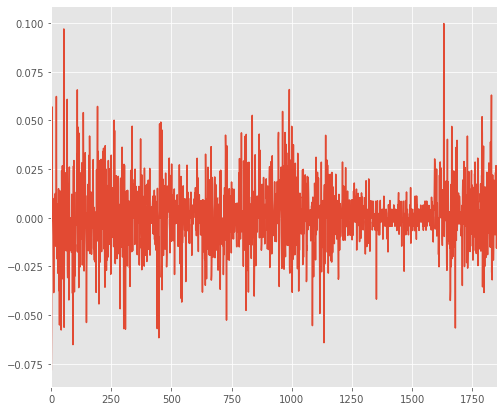

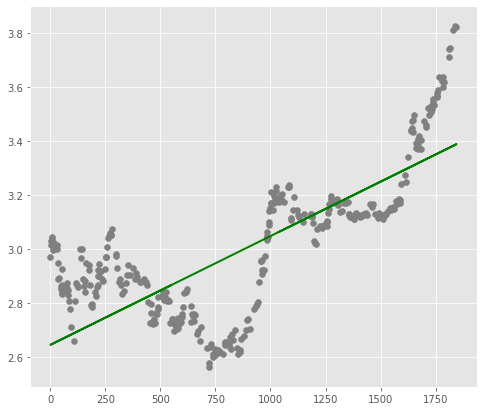

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

In [832]:
rets23 = close_px23 / close_px23.shift(1) - 1
rets23.plot(label='return')

#Line gradient of linear regression very positive:
#Means it is profitable.
plt.figure (3)
plt.scatter ( X23_test, y23_test,  color='gray' )
plt.plot ( X23_test, y23_pred, color='green', linewidth=2 )
plt.show ()

plt.figure( figsize = ( 15, 10 ) )


#### Correlation Analysis — Does one competitor affect others?

We can analyse the stocks by running the percentage change and correlation function in pandas. 
* Percentage change will find out how much the price changes compared to the previous days which will define returns. Knowing the correlations will help us see whether the returns of each stock is affected by other stocks' returns.

Note:
* close is for stock 1.
* close 1 is for stock 11.
* close 2 is for stock 293
* close 3 is for stock 857.
* close 4 is for stock 13.
* close 5 is for stock 23.

In [833]:
dfcomp = dfStock1
dfcomp = pd.concat([dfcomp.close, dfStock11.close1, dfStock293.close2, dfStock857.close3, dfStock13.close4, dfStock23.close5 ], axis = 1)
dfcomp.tail()

,close,close1,close2,close3,close4,close5
1851,101.1,106.7,21.35,NaN,79.30,47.20
1852,101.3,108.9,21.40,NaN,79.20,47.15
1853,102.5,111.4,21.50,NaN,79.45,47.50
1854,101.5,112.9,21.40,NaN,79.55,48.00
1855,100.6,112.9,21.40,NaN,79.60,47.80


In [834]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
print (corr)

           close    close1    close2    close3    close4    close5
close   1.000000  0.455929  0.439098 -0.006265  0.805933  0.480720
close1  0.455929  1.000000  0.364262 -0.044443  0.449393  0.439498
close2  0.439098  0.364262  1.000000 -0.034580  0.436777  0.386023
close3 -0.006265 -0.044443 -0.034580  1.000000 -0.016128 -0.015231
close4  0.805933  0.449393  0.436777 -0.016128  1.000000  0.414038
close5  0.480720  0.439498  0.386023 -0.015231  0.414038  1.000000


#### Below, I've created a heatmap comparing the closing prices of all 5 stocks. All of the stocks seem to have a postive correlation.

#### The heatmap uses a scatter_matrix to visualize the possible correlations between the stocks. The diagonal point uses Kernel Density Estimate . KDE is used for data smoothing problem where inferences of the population are made based on the sample data. It generates estimations of the overall distributions.

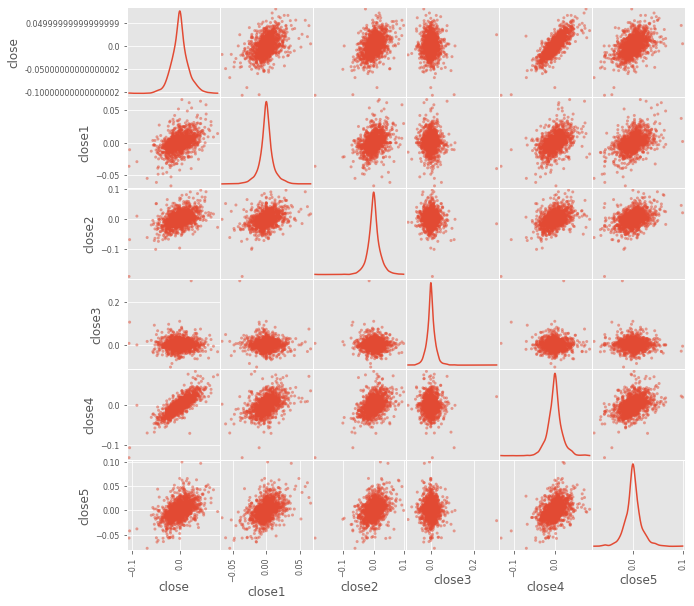

In [835]:
from pandas.plotting import scatter_matrix

scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

#### To prove the postive correlations, I used a heat map to visualize the correlation ranges among the stock markets. The lighter the colour, the more correlated the 2 stocks are. Seems like all the stocks have a postive correlation with each other.

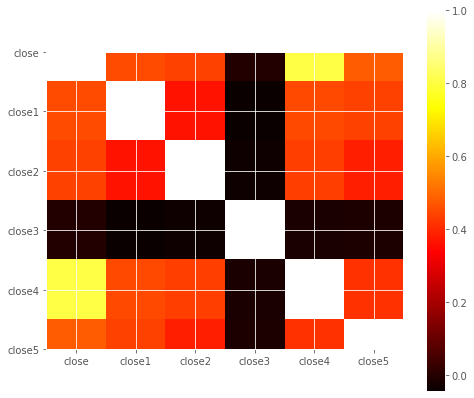

In [836]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

#### From the scatter matrix heat map we found a lot of correlations between the stocks but causality could not mean anything. It could just be a coincidence. It also doesn't show how different stocks affect each other.

### Stocks Returns Rate and Risk
#### Now to analyze the stock's risks and returns. In this case we are trying to get the average returns (return rate) and te standard deviation of returns (risks).

Reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7


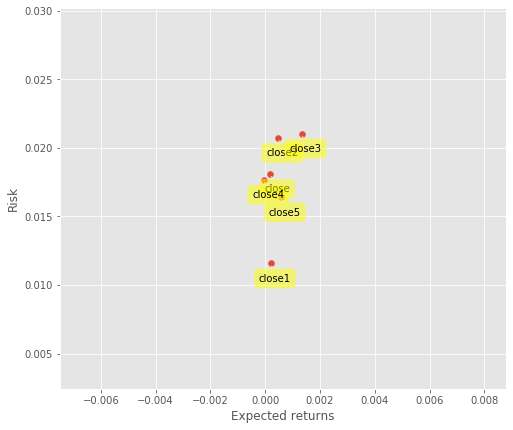

In [837]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))


The chart above shows risk and return comparisons for each stock. Logically, risk should be minimized as well as returns. So, it is up to you where you should draw the line. You should create the rules to buy the stocks under the line and ssell the stocks above the line. This lline showcases your expected value threshold and your baseline for buy/sell decisions.

This is an example (reference: https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7):

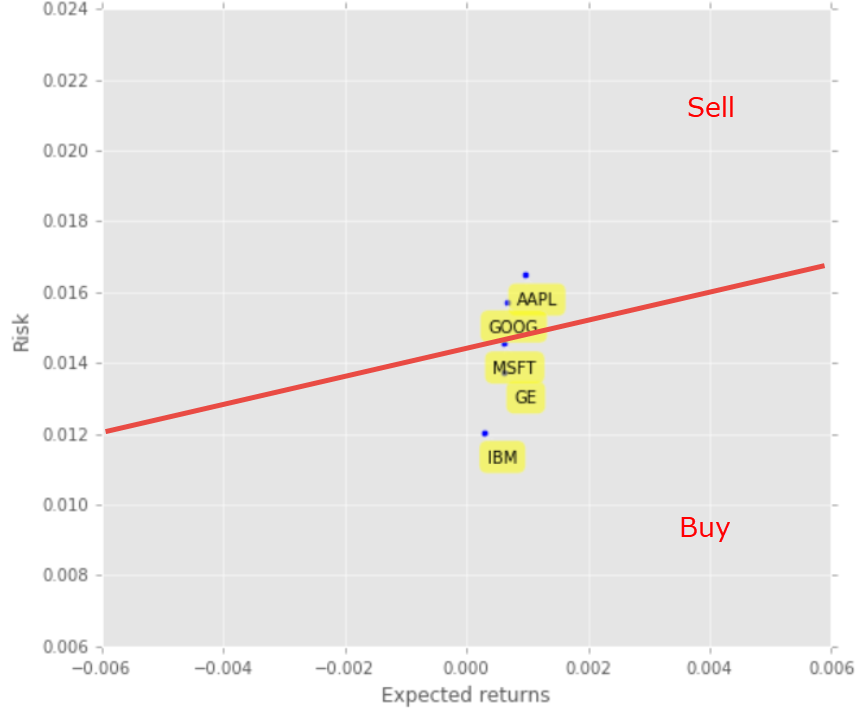

Some patterns I found:
* Generally the features open, close, high, low and volume have a correlation:
 * 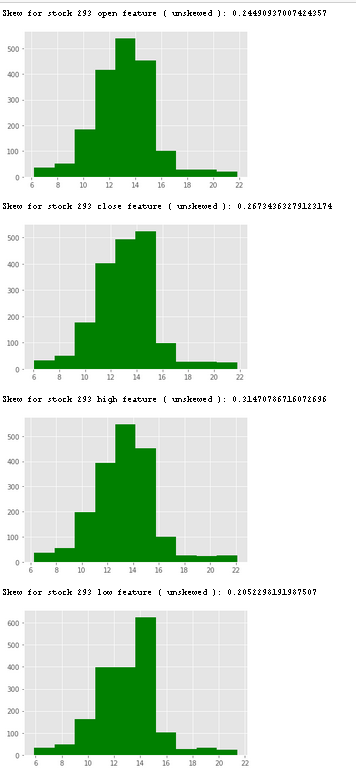
 * All the features go up or down together! As shown in the picture above as proof. If you use a histogram to display the features one at a time for each stock, you will realize that all the features follow each other and that the histograms of each feature of the particular stock have the same shapes.

* Big stocks affect small stocks:
 * Stock 11 has a really high price while stock 293 has a really small price. However, the stocks' prices all go up and down togehter for both stocks
 * 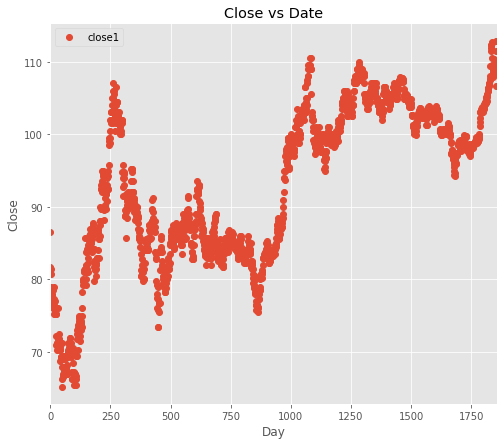


  * 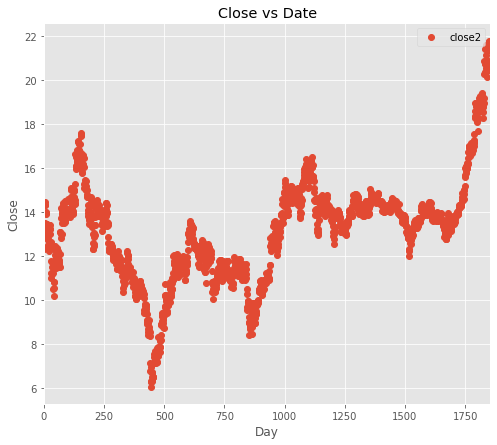

As you can see above, the shape and incline and decline of closing prices are very similar in direction for both the stocks. So my hypothesis is that big stocks affect small stocks based on their actions or that stock 11 and stock 293 are related somewhat.